In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

import os
import sys
import pathlib
import fssa
import networkx as nx
import igraph as ig
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from cycler import cycler
import numpy as np
from collections import Counter

from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()  # create object for the class

from scipy.optimize import curve_fit
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

%matplotlib inline

try:
    sys.path.append('/media/nahuel-ofi/datos/d/Dropbox/doctorado_dbox/software/python/settings')
    from mpl_settings import *
except:
    sys.path.append('/media/nahuel/datos/d/Dropbox/doctorado_dbox/software/python/settings')
    from mpl_settings import *
    
    
fig_dir = '../figs'
net_dir_name = '../networks/ER'

attacks = ['BtwU', 'DegU', 'Ran']
#attacks = ['Ran']
def get_ccdf(data):
    """
    Plot the complementary cumulative distribution function
    (1-CDF(x)) based on the data on the axes object.
    
    Note that this way of computing and plotting the ccdf is not
    the best approach for a discrete variable, where many
    observations can have exactly same value!
    """
    # Note that, here we use the convention for presenting an 
    # empirical 1-CDF (ccdf) as discussed above
    sorted_vals = np.sort(np.unique(data))
    ccdf = np.zeros(len(sorted_vals))
    n = float(len(data))
    for i, val in enumerate(sorted_vals):
        ccdf[i] = np.sum(data >= val)/n
    return sorted_vals, ccdf

/media/nahuel-ofi/datos/d/anaconda3/envs/networks3/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [2]:
N_values = [125, 250, 500, 1000, 2000, 4000, 8000, 16000]
p_values = [0.032, 0.016, 0.008, 0.004, 0.002, 0.001, 0.0005, 0.00025]
dfs = {}
for attack in attacks:
    print(attack)
    dfs[attack] = {}
    for N, p in zip(N_values, p_values):

        network_base = 'ER_N{}_p{}'.format(N, p)
        csv_file_name = os.path.join(net_dir_name, network_base, '{}.csv'.format(attack))    
        df = pd.read_csv(csv_file_name, index_col=0)

        dfs[attack][N] = df

BtwU
DegU
Ran


In [3]:
palette = sns.cubehelix_palette(
    n_colors=len(N_values), start=2.0, rot=0.35, gamma=1.0, hue=1.0, light=0.6, dark=0.2,
)
plt.rc('axes', prop_cycle=cycler('color', palette))

## Ran

In [130]:
dfs['BtwU'][N][5000:5100]

,t,Sgcc,varSgcc,Nsec,meanS2,binder
5000,0.312500,0.000474,0.000015,7.583333,3.973917,0.661201
5001,0.312563,0.000474,0.000015,7.500000,3.970714,0.661201
5002,0.312625,0.000474,0.000015,7.500000,3.967526,0.661201
5003,0.312688,0.000474,0.000015,7.500000,3.964337,0.661201
5004,0.312750,0.000469,0.000016,7.500000,3.961249,0.660793
5005,0.312812,0.000469,0.000016,7.500000,3.958075,0.660793
5006,0.312875,0.000469,0.000016,7.500000,3.954915,0.660793
5007,0.312937,0.000469,0.000016,7.500000,3.951771,0.660793
5008,0.313000,0.000469,0.000016,7.500000,3.948595,0.660793
5009,0.313063,0.000469,0.000016,7.500000,3.945449,0.660793


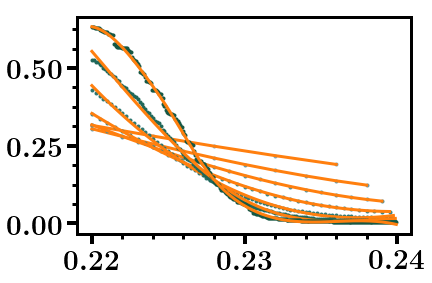

In [164]:
attack = 'BtwU'
for N in N_values[1:]:
    min_t = 0.22
    max_t = 0.24
    spl = UnivariateSpline(dfs[attack][N]['t'][int(min_t*N):int(max_t*N)], (dfs[attack][N]['Sgcc'][int(min_t*N):int(max_t*N)]), s=0.01)
    plt.plot(dfs[attack][N]['t'][int(min_t*N):int(max_t*N)], dfs[attack][N]['Sgcc'][int(min_t*N):int(max_t*N)], '.')
    plt.plot(dfs[attack][N]['t'][int(min_t*N):int(max_t*N)], spl(dfs[attack][N]['t'][int(min_t*N):int(max_t*N)]), color=colors[1])

[10.866336904761766, 13.68100097125109, 16.35108429203172, 16.632337862982776, 16.81237720554538, 8.819444630728015]


ValueError: Found input variables with inconsistent numbers of samples: [8, 6]

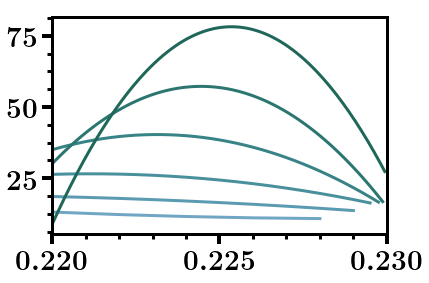

In [161]:
attack = 'BtwU'
from scipy.interpolate import UnivariateSpline
der_max = []
for N in N_values[2:]:
    min_t = 0.22
    max_t = 0.23
    spl = UnivariateSpline(dfs[attack][N]['t'][int(min_t*N):int(max_t*N)], (dfs[attack][N]['Sgcc'][int(min_t*N):int(max_t*N)]), s=0.015)
    #plt.plot(dfs[attack][1000]['t'], dfs[attack][1000]['Sgcc'], '.')
    #plt.plot(dfs[attack][1000]['t'], spl(dfs[attack][1000]['t']), color=colors[1])

    plt.plot(dfs[attack][N]['t'][int(min_t*N):int(max_t*N)], -spl.derivative(1)(dfs[attack][N]['t'][int(min_t*N):int(max_t*N)]))
    #der_max.append(np.argmax(-spl.derivative(1)(dfs[attack][N]['t']))/N)
    der_max.append(-np.max(spl.derivative(1)(dfs[attack][N]['t'][int(min_t*N):int(max_t*N)])))
    plt.xlim(min_t, max_t)
    #plt.ylim(-2.5, -1.5)
print(der_max)
X = np.log(N_values).reshape(-1, 1)
Y = np.log(der_max).reshape(-1, 1)
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
slope = linear_regressor.coef_[0][0]

plt.figure()
plt.plot(N_values, der_max, 'o')
plt.plot(N_values, np.exp(Y_pred), '--', color='k', label=r'{{{:.4f}}}'.format(slope))
plt.legend(loc='best')
plt.xscale('log')
plt.yscale('log')

(0.4, 0.6)

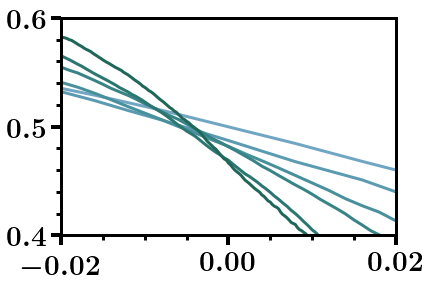

In [43]:
for i, N in enumerate(_N_values[:-2]):
    #ax.plot(dfs[N]['t'], dfs[N]['Sgcc']/(dfs[N]['Sgcc'][0]*(1-dfs[N]['t'])), label='{}'.format(N))
    plt.plot(dfs[attack][N]['t']-fc_values['Nsec'][i], dfs[attack][N]['binder'], label='{}'.format(N))
plt.xlim(-0.02, 0.02)
plt.ylim(0.4, 0.6)

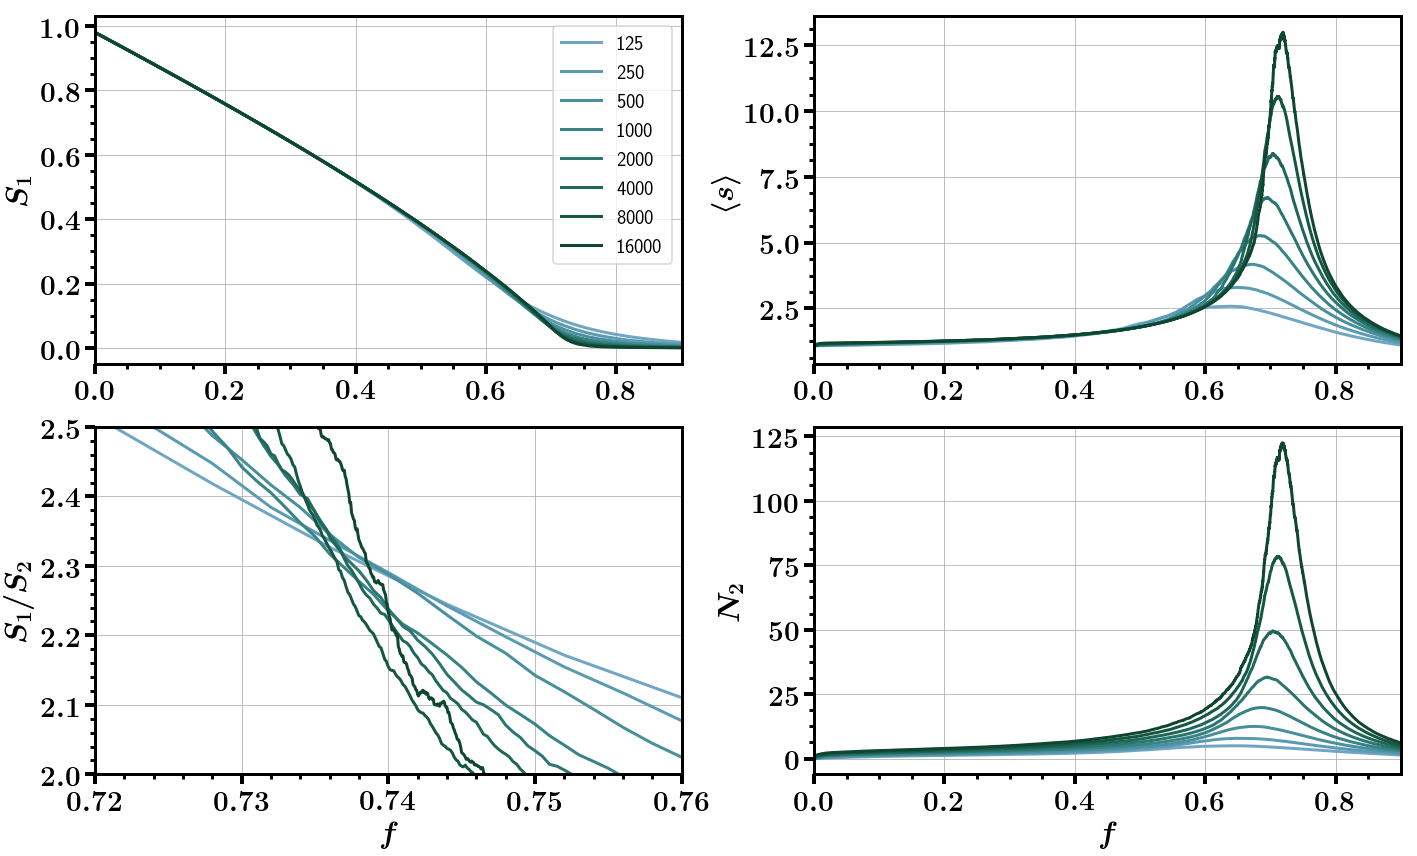

In [10]:
_N_values = N_values

attack = 'Ran'

ncols = 2
nrows = 2
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)

for ax in axes.flatten():
    ax.set_xlim(0., 0.9)
    ax.grid(True)

ax = axes[0][0]
#ax.plot(dfs[N]['t'], 1-dfs[N]['t'], color='black', linestyle='-.', label='')
for N in _N_values:
    #ax.plot(dfs[N]['t'], dfs[N]['Sgcc']/(dfs[N]['Sgcc'][0]*(1-dfs[N]['t'])), label='{}'.format(N))
    ax.plot(dfs[attack][N]['t'], dfs[attack][N]['Sgcc'], label='{}'.format(N))
ax.set_ylabel(r'$S_1$')
#ax.set_ylim(0.6, 1)
ax.legend(loc='best', fontsize=20)

ax = axes[0][1]
for N in _N_values:
    ax.plot(dfs[attack][N]['t'], dfs[attack][N]['meanS2'])
ax.set_ylabel(r'$\langle s \rangle $')

ax = axes[1][1]
for N in _N_values:
    ax.plot(dfs[attack][N]['t'], dfs[attack][N]['Nsec'])
ax.set_ylabel(r'$N_2$')

ax = axes[1][0]
#ax.set_yscale('log')
ax.set_ylim(2, 2.5)
ax.set_xlim(0.72, 0.76)
ax.axvline(0.225, color='k', linestyle='--')

for N in _N_values:
    ax.plot(dfs[attack][N]['t'], N*dfs[attack][N]['Sgcc']/dfs[attack][N]['Nsec'])
ax.set_ylabel(r'$S_1/S_2$')


axes[1][0].set_xlabel(r'$f$')
axes[1][1].set_xlabel(r'$f$')

measures = ['meanS2', 'Nsec']
    
plt.tight_layout()
fig_name = os.path.join(fig_dir, 'fssa_{}'.format(attack))
#plt.savefig(fig_name + '.png')
#plt.savefig(fig_name + '.pdf')
plt.show()

In [14]:
def get_fc_N(dfs, attack, sizes, measure):

    fcs = []
    peaks = []
    for N in sizes:
        idx = dfs[attack][N][measure].idxmax()    
        fcs.append(idx/N)
        peaks.append(dfs[attack][N][measure][idx])
    return np.array(fcs), np.array(peaks)

def get_crit_measure_N(dfs, attack, sizes, measure, fc_values):
    n_sizes = len(sizes)
    if isinstance(fc_values, float):
        fc_values = [fc_values] * n_sizes
        
    crit_values = []    
    for N, fc in zip(sizes, fc_values):
        crit_values.append(dfs[attack][N][measure][int(fc*N)])
        
    return np.array(crit_values)  

def get_slopes(sizes, peak_values, measure_fc_values):
    slopes = dict(max={}, fc={})
    Y_preds = dict(max={}, fc={})
    for measure in measures:
        X = np.log(sizes).reshape(-1, 1)

        Y = np.log(peak_values[measure]).reshape(-1, 1)
        linear_regressor.fit(X, Y)  # perform linear regression
        Y_pred = linear_regressor.predict(X)  # make predictions
        Y_preds['max'][measure] = Y_pred
        slope = linear_regressor.coef_[0][0]
        slopes['max'][measure] = slope

        Y = np.log(measure_fc_values[measure]).reshape(-1, 1)
        linear_regressor.fit(X, Y)  # perform linear regression
        Y_pred = linear_regressor.predict(X)  # make predictions
        Y_preds['fc'][measure] = Y_pred
        slope = linear_regressor.coef_[0][0]
        slopes['fc'][measure] = slope
    return Y_preds, slopes

_N_values = N_values
attack = 'Ran'
measures= ['meanS2', 'Nsec']
peak_values = {}
fc_values = {}
measure_fc_values = {}
fc = 0.73
for measure in measures:
    fc_values[measure], peak_values[measure] = get_fc_N(dfs, attack, _N_values, measure)
    measure_fc_values[measure] = get_crit_measure_N(dfs, attack, _N_values, measure, fc)
    
Y_preds, slopes = get_slopes(_N_values, peak_values, measure_fc_values)

In [16]:
tc_values = np.linspace(0.73, 0.753, 100)
for i, _tc in enumerate(tc_values):
    X = np.log(np.array(_N_values).reshape(-1, 1))
    Y = np.log(_tc-fc_values['Nsec'].reshape(-1, 1))
    linear_regressor.fit(X, Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)  # make predictions
    slope = linear_regressor.coef_[0][0]
    r2 = linear_regressor.score(X, Y)
    print('{:.5f}\t{:.4f}\t{:.4f}\t{:.6f}'.format(_tc, slope, 1/slope, r2))

0.73000	-0.4003	-2.4983	0.986755
0.73023	-0.3972	-2.5175	0.987278
0.73046	-0.3942	-2.5366	0.987779
0.73070	-0.3913	-2.5557	0.988260
0.73093	-0.3884	-2.5746	0.988721
0.73116	-0.3856	-2.5935	0.989164
0.73139	-0.3828	-2.6124	0.989589
0.73163	-0.3801	-2.6311	0.989998
0.73186	-0.3774	-2.6498	0.990390
0.73209	-0.3747	-2.6685	0.990767
0.73232	-0.3722	-2.6870	0.991129
0.73256	-0.3696	-2.7055	0.991477
0.73279	-0.3671	-2.7240	0.991811
0.73302	-0.3646	-2.7424	0.992133
0.73325	-0.3622	-2.7607	0.992442
0.73348	-0.3598	-2.7790	0.992739
0.73372	-0.3575	-2.7973	0.993025
0.73395	-0.3552	-2.8155	0.993300
0.73418	-0.3529	-2.8336	0.993565
0.73441	-0.3507	-2.8517	0.993820
0.73465	-0.3485	-2.8698	0.994064
0.73488	-0.3463	-2.8878	0.994300
0.73511	-0.3441	-2.9057	0.994527
0.73534	-0.3420	-2.9237	0.994745
0.73558	-0.3400	-2.9415	0.994954
0.73581	-0.3379	-2.9594	0.995156
0.73604	-0.3359	-2.9772	0.995350
0.73627	-0.3339	-2.9949	0.995537
0.73651	-0.3319	-3.0127	0.995717
0.73674	-0.3300	-3.0304	0.995890
0.73697	-0

In [8]:
from scipy.optimize import least_squares

def residuals(pars, N, y):
    tc, nu, a = pars
    return tc - a*N**(-1/nu) - y
measure = 'Nsec'
pars0 = np.array([0.75, 1, 3])
least_squares(residuals, pars0, args=(_N_values, fc_values[measure]), method='lm')

 active_mask: array([0, 0, 0])
        cost: 2.003220364123158e-06
         fun: array([ 7.91780853e-04, -1.29595080e-03, -4.45833945e-04,  8.65614630e-04,
        7.23872414e-05,  2.84284030e-04,  4.24596311e-04, -6.96878319e-04])
        grad: array([9.62563362e-13, 1.66858506e-12, 3.12612939e-11])
         jac: array([[ 1.        , -0.0370101 , -0.27091987],
       [ 1.        , -0.03508796, -0.22460537],
       [ 1.        , -0.03274139, -0.18620847],
       [ 1.        , -0.03017169, -0.15437562],
       [ 1.        , -0.02752372, -0.12798468],
       [ 1.        , -0.02489934, -0.10610535],
       [ 1.        , -0.02236788, -0.08796635],
       [ 1.        , -0.01997425, -0.07292826]])
     message: '`ftol` termination condition is satisfied.'
        nfev: 73
        njev: None
  optimality: 3.126129386686041e-11
      status: 2
     success: True
           x: array([0.74557084, 3.69721628, 0.38675296])

In [213]:
dfs['Ran'][16000]['Sgcc'][0]

0.980147

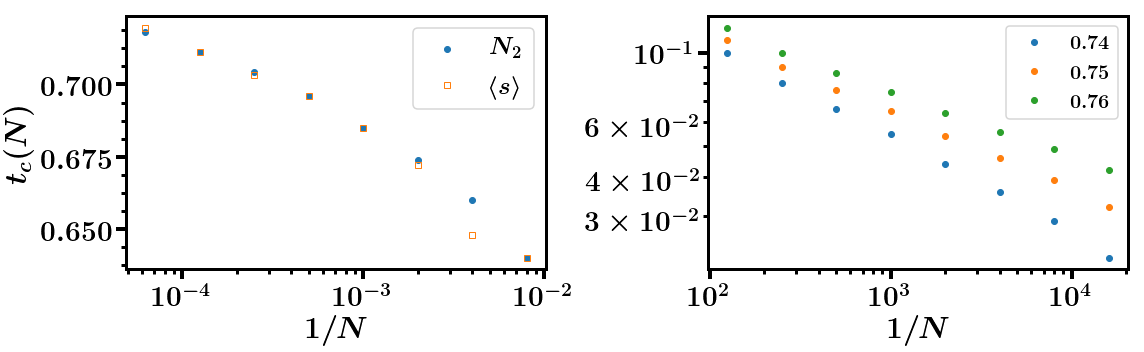

In [13]:
ncols = 2
nrows = 1
fig, axes = plt.subplots(figsize=(8*ncols, 5*nrows), ncols=ncols, nrows=nrows)

ax = axes[0]
ax.set_xscale('log')
ax.set_xlabel(r"$1/N$") 
ax.plot(1/np.array(_N_values), fc_values['Nsec'], 'o', color=colors[0], label=r'$N_{2}$')
ax.plot(1/np.array(_N_values), fc_values['meanS2'], 's', color=colors[1], 
        label=r"$\langle s \rangle $", markerfacecolor='none')
ax.set_ylabel(r'$t_c(N)$')
ax.legend(loc='best', fontsize=24)

tc = 0.73
ax = axes[1]
for i, _tc in enumerate([0.74, 0.75, 0.76]):
    ax.plot(np.array(_N_values), _tc-fc_values['Nsec'], 'o', color=colors[i], label=r'${{{}}}$'.format(_tc))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r"$1/N$") 
ax.legend(loc='best', fontsize=20)

plt.tight_layout()
fig_name = os.path.join(fig_dir, 'fc_{}'.format(attack))
#plt.savefig(fig_name + '.png')
#plt.savefig(fig_name + '.pdf')
plt.show()

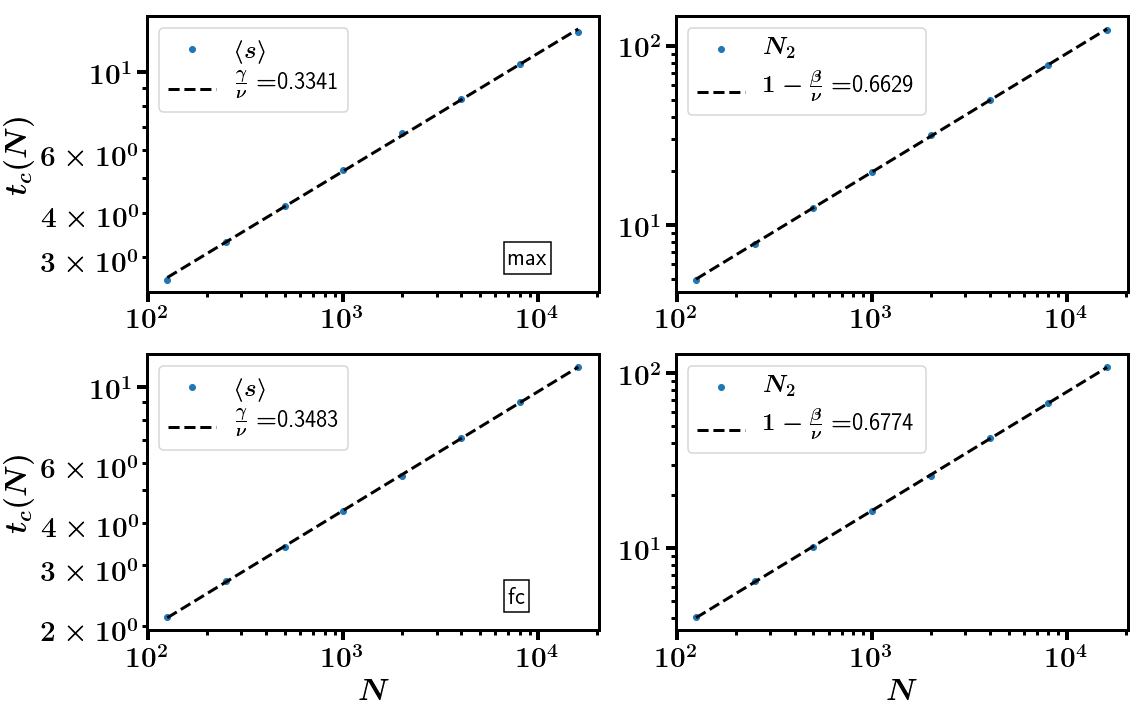

In [167]:
ncols = 2
nrows = len(measures)
fig, axes = plt.subplots(figsize=(8*ncols, 5*nrows), ncols=ncols, nrows=nrows)

for ax in axes.flatten():
    ax.set_xscale('log')
    ax.set_yscale('log')
for ax in axes[-1,:]:
    ax.set_xlabel(r'$N$')
for ax in axes[:,0]:
    ax.set_ylabel(r'$t_c(N)$')

labels = [r'$\langle s \rangle $', r'$N_{2}$']

ax = axes[0][0]
measure = 'meanS2'
criterium = 'max'
ax.plot(np.array(_N_values), peak_values[measure], 'o', color=_colors[0], label=r'$\langle s \rangle $')
ax.plot(_N_values, np.exp(Y_preds[criterium][measure]), '--', color='k', 
        label=r'$\frac{\gamma}{\nu} = $' + '{:.4f}'.format(slopes[criterium][measure]))
ax.legend(loc='best', fontsize=24)
ax.text(0.8, 0.1, 'max', fontsize=24, transform=ax.transAxes, 
       bbox=dict(facecolor='none', edgecolor='black'))

ax = axes[0][1]
measure = 'Nsec'
criterium = 'max'
ax.plot(np.array(_N_values), peak_values[measure], 'o', color=_colors[0], label=r'$N_{2}$')
ax.plot(_N_values, np.exp(Y_preds[criterium][measure]), '--', color='k', 
        label=r'$1 - \frac{\beta}{\nu} = $' + '{:.4f}'.format(slopes[criterium][measure]))
ax.legend(loc='best', fontsize=24)

ax = axes[1][0]
measure = 'meanS2'
criterium = 'fc'
ax.plot(np.array(_N_values), measure_fc_values[measure], 'o', color=_colors[0], label=r'$\langle s \rangle $')
ax.plot(_N_values, np.exp(Y_preds[criterium][measure]), '--', color='k', 
        label=r'$\frac{\gamma}{\nu} = $' + '{:.4f}'.format(slopes[criterium][measure]))
ax.legend(loc='best', fontsize=24)
ax.text(0.8, 0.1, 'fc', fontsize=24, transform=ax.transAxes, 
       bbox=dict(facecolor='none', edgecolor='black'))

ax = axes[1][1]
measure = 'Nsec'
criterium = 'fc'
ax.plot(np.array(_N_values), measure_fc_values[measure], 'o', color=_colors[0], label=r'$N_{2}$')
ax.plot(_N_values, np.exp(Y_preds[criterium][measure]), '--', color='k', 
        label=r'$1 - \frac{\beta}{\nu} = $' + '{:.4f}'.format(slopes[criterium][measure]))
ax.legend(loc='best', fontsize=24)


plt.tight_layout()
fig_name = os.path.join(fig_dir, 'fc_{}'.format(attack))
plt.savefig(fig_name + '.png')
plt.savefig(fig_name + '.pdf')
plt.show()

NameError: name 'tc_values' is not defined

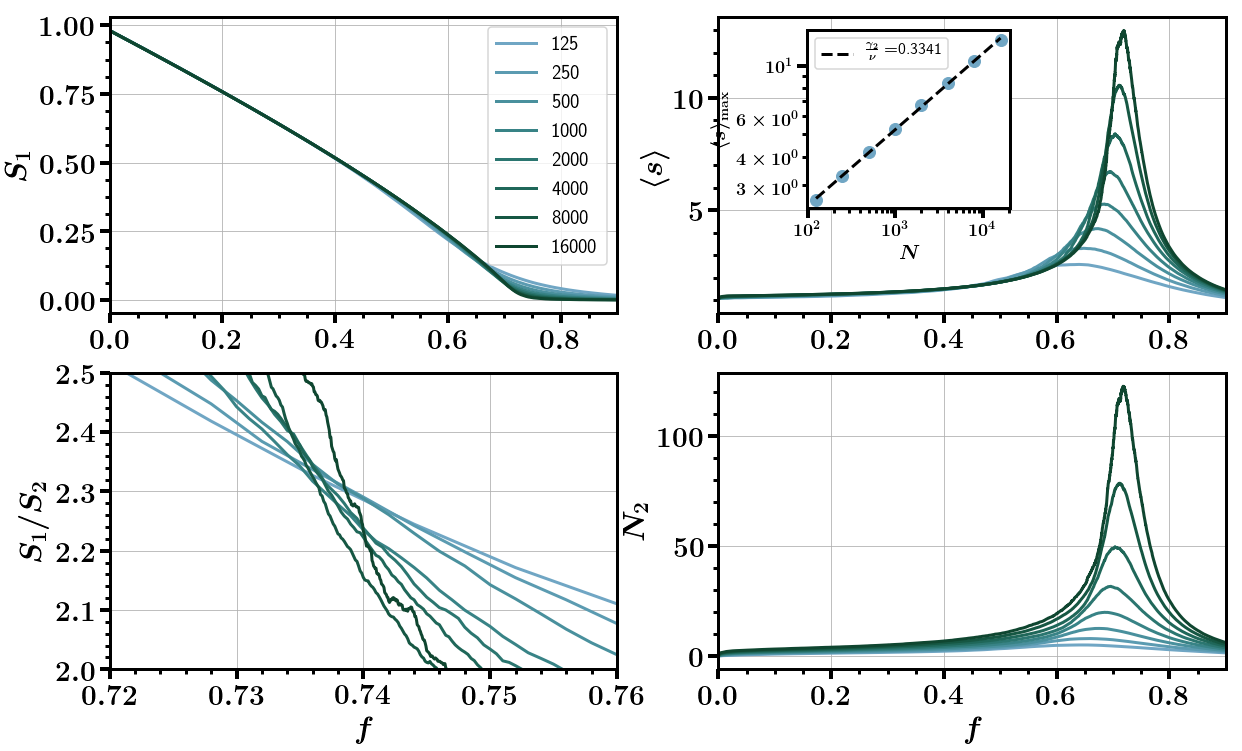

In [4]:
_N_values = N_values

attack = 'Ran'

ncols = 2
nrows = 2
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)

for ax in axes.flatten():
    ax.set_xlim(0., 0.9)
    ax.grid(True)

ax = axes[0][0]
#ax.plot(dfs[N]['t'], 1-dfs[N]['t'], color='black', linestyle='-.', label='')
for N in _N_values:
    #ax.plot(dfs[N]['t'], dfs[N]['Sgcc']/(dfs[N]['Sgcc'][0]*(1-dfs[N]['t'])), label='{}'.format(N))
    ax.plot(dfs[attack][N]['t'], dfs[attack][N]['Sgcc'], label='{}'.format(N))
ax.set_ylabel(r'$S_1$')
#ax.set_ylim(0.6, 1)
ax.legend(loc='best', fontsize=20)

ax = axes[0][1]
for N in _N_values:
    ax.plot(dfs[attack][N]['t'], dfs[attack][N]['meanS2'])
ax.set_ylabel(r'$\langle s \rangle $')

ax = axes[1][1]
for N in _N_values:
    ax.plot(dfs[attack][N]['t'], dfs[attack][N]['Nsec'])
ax.set_ylabel(r'$N_2$')

ax = axes[1][0]
#ax.set_yscale('log')
ax.set_ylim(2, 2.5)
ax.set_xlim(0.72, 0.76)
ax.axvline(0.225, color='k', linestyle='--')

for N in _N_values:
    ax.plot(dfs[attack][N]['t'], N*dfs[attack][N]['Sgcc']/dfs[attack][N]['Nsec'])
ax.set_ylabel(r'$S_1/S_2$')


axes[1][0].set_xlabel(r'$f$')
axes[1][1].set_xlabel(r'$f$')

measures = ['meanS2', 'Nsec']

_N_values = N_values

peaks = {}
slopes = {}
Y_preds = {}
for measure in measures:
    peak = []
    for N in _N_values:

        idx = dfs[attack][N][measure].idxmax()
        Y = dfs[attack][N][measure][idx]
        peak.append(Y)
    peaks[measure] = np.array(peak)

    X = np.log(_N_values).reshape(-1, 1)
    Y = np.log(peak).reshape(-1, 1)
    linear_regressor.fit(X, Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)  # make predictions
    Y_preds[measure] = Y_pred
    slope = linear_regressor.coef_[0][0]
    slopes[measure] = slope


axins = inset_axes(axes[0][1], width="100%", height="100%",
                   bbox_to_anchor=(.2, .4, .4, .60),
                   bbox_transform=axes[0][1].transAxes)
                   #loc=2, borderpad=3)
axins.set_xscale('log')
axins.set_yscale('log')
axins.tick_params(which='major', labelsize=18)
axins.tick_params(which='minor', labelsize=18)
axins.set_xlabel(r"$N$", fontsize=20) 
axins.plot(_N_values, peaks['meanS2'], 'o', markersize=12)
axins.plot(_N_values, np.exp(Y_preds['meanS2']), '--', color='k', linewidth=3, 
        label=r"$\frac{\gamma_2}{\nu} = $" + '{:.4f}'.format(slopes['meanS2']))
axins.legend(loc='best', fontsize=16)    
axins.set_ylabel(r"$\langle s \rangle_{\mathrm{max}} $", fontsize=20) 

X = np.log(_N_values).reshape(-1, 1)
Nsec_tc = [dfs[attack][N]['Nsec'][int(N*tc_values['Nsec'][i])] for (i, N) in enumerate(_N_values)]
#Nsec_tc = [dfs[attack][N]['Nsec'][int(N*0.74)] for (i, N) in enumerate(_N_values)]
Nsec_tc = np.array(Nsec_tc)
Y = np.log(Nsec_tc).reshape(-1, 1)
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
slope = linear_regressor.coef_[0][0]

axins = inset_axes(axes[1][1], width="100%", height="100%",
                   bbox_to_anchor=(.2, .4, .4, .60),
                   bbox_transform=axes[1][1].transAxes)
                   #loc=2, borderpad=3)
axins.set_xscale('log')
axins.set_yscale('log')
axins.tick_params(which='major', labelsize=18)
axins.tick_params(which='minor', labelsize=18)
axins.set_xlabel(r"$N$", fontsize=20) 
#axins.plot(_N_values, peaks['Nsec'], 'o', markersize=12)    
#axins.plot(_N_values, np.exp(Y_preds['Nsec']), '--', color='k', linewidth=3, 
#        label=r"$1 - \frac{\beta}{\nu} = $" + '{:.4f}'.format(slopes['Nsec']))
for N, tc_N in zip(N_values, tc_values['Nsec']):
    plt.scatter(N, dfs[attack][N]['Nsec'][int(N*tc_N)], color=colors[0])
    #plt.scatter(N, dfs[attack][N]['Nsec'][int(N*0.74)], color=colors[0])
axins.plot(_N_values, np.exp(Y_pred), '--', color='k', linewidth=3, 
        label=r"$1 - \frac{\beta}{\nu} = $" + '{:.4f}'.format(slope))


#axins.plot(_N_values, peaks['Nsec'], 'o', markersize=12)    
#axins.plot(_N_values, np.exp(Y_preds['Nsec']), '--', color='k', linewidth=3, 
#        label=r"$1 - \frac{\beta}{\nu} = $" + '{:.4f}'.format(slopes['Nsec']))

axins.legend(loc='best', fontsize=16)    
axins.set_ylabel(r"$N_{2,\mathrm{max}}$", fontsize=20)  

    
plt.tight_layout()
fig_name = os.path.join(fig_dir, 'fssa_{}'.format(attack))
#plt.savefig(fig_name + '.png')
#plt.savefig(fig_name + '.pdf')
plt.show()

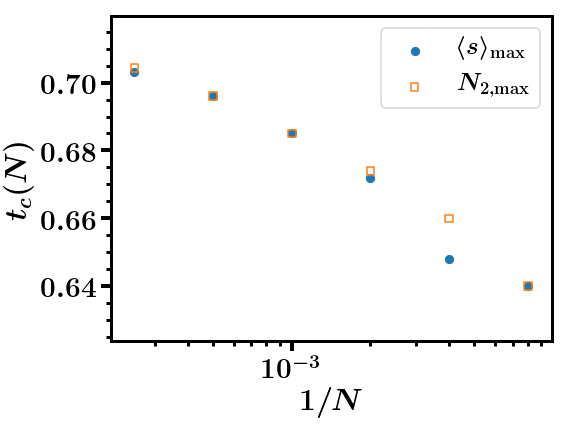

In [62]:
measures = ['meanS2', 'Nsec']

_N_values = N_values

peaks = {}
slopes = {}
Y_preds = {}
tc_values = {}
for measure in measures:
    peak = []
    tc = []
    for N in _N_values:

        idx = dfs[attack][N][measure].idxmax()
        Y = dfs[attack][N][measure][idx]
        peak.append(Y)
        tc.append(idx/N)
    peaks[measure] = np.array(peak)
    tc_values[measure] = np.array(tc)
    
    X = np.log(_N_values).reshape(-1, 1)
    Y = np.log(peak).reshape(-1, 1)
    linear_regressor.fit(X, Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)  # make predictions
    Y_preds[measure] = Y_pred
    slope = linear_regressor.coef_[0][0]
    slopes[measure] = slope

ncols = 1
nrows = 1
fig, axes = plt.subplots(figsize=(8*ncols, 6*nrows), ncols=ncols, nrows=nrows)

ax = axes
ax.set_xscale('log')
ax.set_xlabel(r"$1/N$") 
    
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
markers = ['o', 's', '^']
facecolors = ['#1f77b4', 'none', '#2ca02c']
labels = [r"$\langle s \rangle_{\mathrm{max}} $", r"$N_{2,\mathrm{max}}$"]
for i, measure in enumerate(measures):
      
    ax.scatter(1/np.array(_N_values), tc_values[measure], marker=markers[i], 
               color=colors[i], facecolor=facecolors[i], s=60, label=labels[i])

ax.set_ylabel(r'$t_c(N)$')
#ax.set_ylim(0.21, 0.23)
#[0].set_ylabel(r"$\chi_{\mathrm{max}}$")   

#axes[1].set_ylabel(r"$\langle s \rangle_{\mathrm{max}} $")   
    
#axes[2].set_ylabel(r"$N_{2,\mathrm{max}}$")  
ax.legend(loc='best', fontsize=24)
plt.tight_layout()
fig_name = os.path.join(fig_dir, 'tc_{}'.format(attack))
#plt.savefig(fig_name + '.png')
#plt.savefig(fig_name + '.pdf')
plt.show()

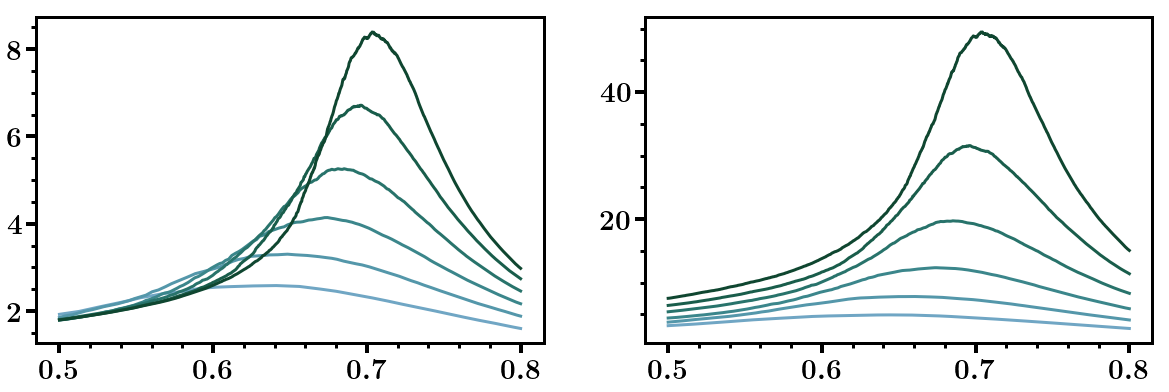

In [114]:
attack = 'Ran'
_N_values = N_values
Nmax = max(_N_values)
n_samples = len(_N_values)
rho = np.linspace(0, 1, Nmax)

measures = ['meanS2', 'Nsec']

a = {}
for measure in measures:
    a[measure] = np.zeros((n_samples, Nmax))
    for i, N in enumerate(_N_values):
        for j in range(Nmax):
            a[measure][i][j] = np.interp(j/Nmax, np.arange(N)/N, dfs[attack][N][measure])
    
    a[measure] = a[measure][:, int(0.50*Nmax):int(0.8*Nmax)]
    da = 0.1*a[measure]
    
rho = rho[int(0.50*Nmax):int(0.8*Nmax)]

ncols = 2
nrows = 1
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)
for j, measure in enumerate(measures):
    for i in range(n_samples):
        axes[j].plot(rho, a[measure][i])

In [119]:
rho0 = 0.75
nu0 = 3
zeta0 = 2
rets = {}
for measure in measures:
    if measure == 'meanS2':
        zeta0 = 1
    else:
        zeta0 = 2
    rets[measure] = fssa.autoscale(_N_values, rho, a[measure], da, rho0, nu0, zeta0)

In [120]:
# critical exponents and errors, quality of data collapse
for measure, ret in rets.items():
    print(measure)
    print(ret.rho, ret.drho)
    print(ret.zeta, ret.dzeta)
    print(ret.nu, ret.dnu)
    print(ret.fun)

meanS2
0.7354401012961536 0.016596065693744978
0.8357764416738642 0.09572156427289706
2.467499580933941 0.5427236394049937
0.004029306661487121
Nsec
0.7374125819083153 0.007824898206779372
1.8689502492852472 0.15953642629908663
2.8118585287339393 0.3073545212652877
0.01967792216678023


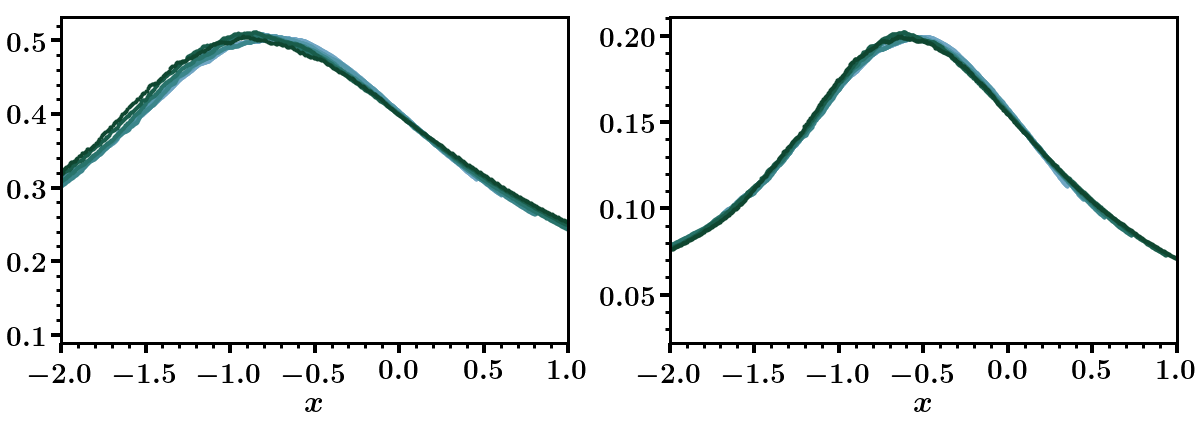

In [121]:
ncols = 2
nrows = 1
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)
for i, measure in enumerate(measures):
    ax = axes[i]
    ret = rets[measure]
    auto_scaled_data = fssa.scaledata(_N_values, rho, a[measure], da, ret.rho, ret.nu, ret.zeta)
    ax.plot(
        auto_scaled_data.x.T, auto_scaled_data.y.T,
        '.',
    )
    ax.set_xbound(-2, 1)
    ax.set_xlabel(r'$x$')
plt.show()

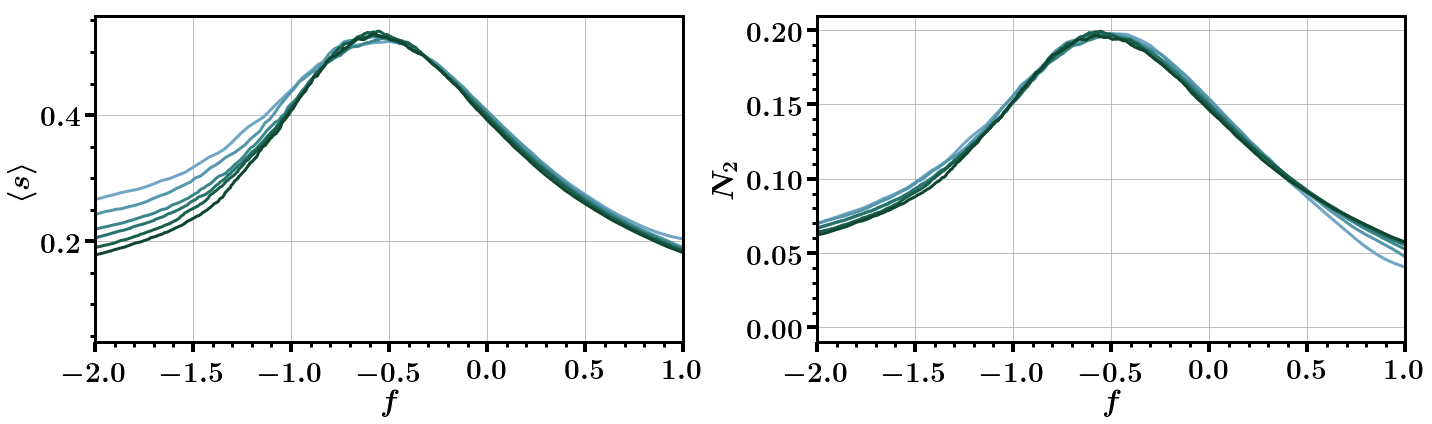

In [122]:
tc = 0.74
nu = 3
zeta = 2 ## zeta / nu = 1 - beta / nu
gamma = 1

palette = sns.cubehelix_palette(
    n_colors=len(N_values), start=2.0, rot=0.35, gamma=1.0, hue=1.0, light=0.6, dark=0.2,
)
plt.rc('axes', prop_cycle=cycler('color', palette))

_N_values = N_values

attack = 'Ran'

ncols = 2
nrows = 1
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)

for ax in axes.flatten():
    ax.set_xlim(-2, 1)
    ax.grid(True)

ax = axes[0]
for N in _N_values:
    ax.plot((dfs[attack][N]['t']-tc)*N**(1/nu), dfs[attack][N]['meanS2']*N**(-gamma/nu))
ax.set_ylabel(r'$\langle s \rangle $')

ax = axes[1]
for N in _N_values:
    ax.plot((dfs[attack][N]['t']-tc)*N**(1/nu), dfs[attack][N]['Nsec']*N**(-zeta/nu))
ax.set_ylabel(r'$N_2$')


axes[0].set_xlabel(r'$f$')
axes[1].set_xlabel(r'$f$')

plt.tight_layout()
fig_name = os.path.join(fig_dir, 'fssa_btw')
#plt.savefig(fig_name + '.png')
#plt.savefig(fig_name + '.pdf')
plt.show()

In [10]:
attack = 'BtwU'
N = 16000
p = '0.00025'
#f_values = ['0.60', '0.65', '0.70', '0.71', '0.72', '0.73', '0.736']
#f_values = ['0.60', '0.65', '0.70', '0.71', '0.72', '0.73', '0.736']
#f_values = ['0.60', '0.65', '0.70', '0.736']
#f_values = ['0.2', '0.223','0.225', '0.227']
f_values = ['0.223']

all_comp_sizes_dict = {}
all_comp_sizes_dict[N] = {}

base_net_name = 'ER_N{}_p{}'.format(N, p)
base_net_dir_name = os.path.join(net_dir_name, base_net_name)

for f_value in f_values:
    print(f_value)
    comp_sizes_file = os.path.join(base_net_dir_name, 'comp_sizes_{}_f{}.txt'.format(attack, f_value))
    comp_sizes = np.loadtxt(comp_sizes_file, dtype=int)

    all_comp_sizes_dict[N][f_value] = comp_sizes

0.223


0.222
0.223
0.225


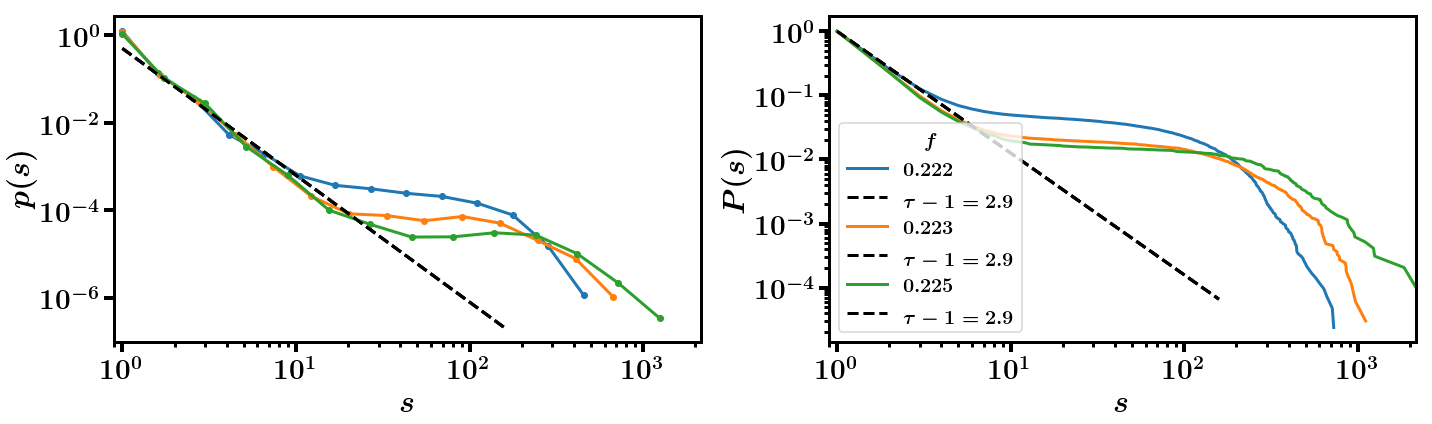

In [31]:
attack = 'BtwU'


def powerlaw(X, a, c):
    return c*X**(-a)
tau = 2.9

# log-scaled bins
ncols = 2
nrows = 1
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)

for j, (N, p, f_value) in enumerate([[4000, '0.001', '0.222'], [8000, '0.0005', '0.223'], [16000, '0.00025', '0.225']]):

    f_values = [f_value]

    all_comp_sizes_dict = {}
    all_comp_sizes_dict[N] = {}

    base_net_name = 'ER_N{}_p{}'.format(N, p)
    base_net_dir_name = os.path.join(net_dir_name, base_net_name)

    for f_value in f_values:
        print(f_value)
        comp_sizes_file = os.path.join(base_net_dir_name, 'comp_sizes_sec_{}_f{}.txt'.format(attack, f_value))
        comp_sizes = np.loadtxt(comp_sizes_file, dtype=int)

        all_comp_sizes_dict[N][f_value] = comp_sizes

    btw_dist_log = {}
    btw_dist_log[N] = {}
    for i, f_value in enumerate(f_values):

        Y = all_comp_sizes_dict[N][f_value]

        mask = Y > 0
        Y = Y[mask]     

        min_s = np.min(Y)
        max_s = np.max(Y)

        bins = np.logspace(np.log10(min_s), np.log10(max_s), 15)
        hist = np.histogram(Y, bins=bins, density=True)
        hist_norm = hist[0]
        #widths = (bins[1:] - bins[:-1])
        #hist_norm = hist[0]/widths
        hist_norm[hist_norm==0] = np.NaN

        btw_dist_log[N][f_value] = [bins, hist_norm]


    for ax in axes:
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_xlabel(r'$s$')
        ax.set_xlim(0.9, np.max([np.max(elem) for elem in all_comp_sizes_dict[N].values()]))

    ax = axes[0]
    ax.set_ylabel(r'$p(s)$')

    for i, f_value in enumerate(f_values):
        bins, hist_norm = btw_dist_log[N][f_value]
        mask = ~np.isnan(hist_norm)
        X = bins[:-1]
        X = X[mask]
        Y = hist_norm[mask]
        axes[0].plot(X, Y, 'o-', label=r'${{{}}}$'.format(f_value), color=colors[j])

    X = np.logspace(0, 2.2, 100)
    Y = powerlaw(X, tau, 0.5)
    ax.plot(X, Y, '--', color='k', label=r'$\tau = {{{}}}$'.format(tau))

    #X = np.logspace(1.5, 3, 100)
    #Y = powerlaw(X, tau, 500)
    #ax.plot(X, Y, '-.', color='k')

    ax = axes[1]
    ax.set_ylabel(r'$P(s)$')
    for i, f_value in enumerate(f_values):
        Y = all_comp_sizes_dict[N][f_value]

        sorted_vals, ccdf = get_ccdf(Y)
        ax.plot(sorted_vals, ccdf, '-' , color=colors[j], label=r'${{{}}}$'.format(f_value))


    X = np.logspace(0, 2.2, 100)
    Y = powerlaw(X, tau-1, 1)
    ax.plot(X, Y, '--', color='k', label=r'$\tau - 1 = {{{}}}$'.format(tau))
    legend = ax.legend(loc='best', title=r'$f$', fontsize=20)
    plt.setp(legend.get_title(),fontsize=20)

plt.tight_layout()
plt.show()

In [87]:
f_value = '0.73'
all_comp_sizes_dict = {}

for N, p in list(zip(N_values, p_values))[-5:]:
    print(N)
    all_comp_sizes_dict[N] = {}
    
    base_net_name = 'ER_N{}_p{}'.format(N, p)
    base_net_dir_name = os.path.join(net_dir_name, base_net_name)

    comp_sizes_file = os.path.join(base_net_dir_name, 'comp_sizes_{}_f{}.txt'.format(attack, f_value))
    comp_sizes = np.loadtxt(comp_sizes_file, dtype=int)

    all_comp_sizes_dict[N][f_value] = comp_sizes

1000
2000
4000
8000
16000


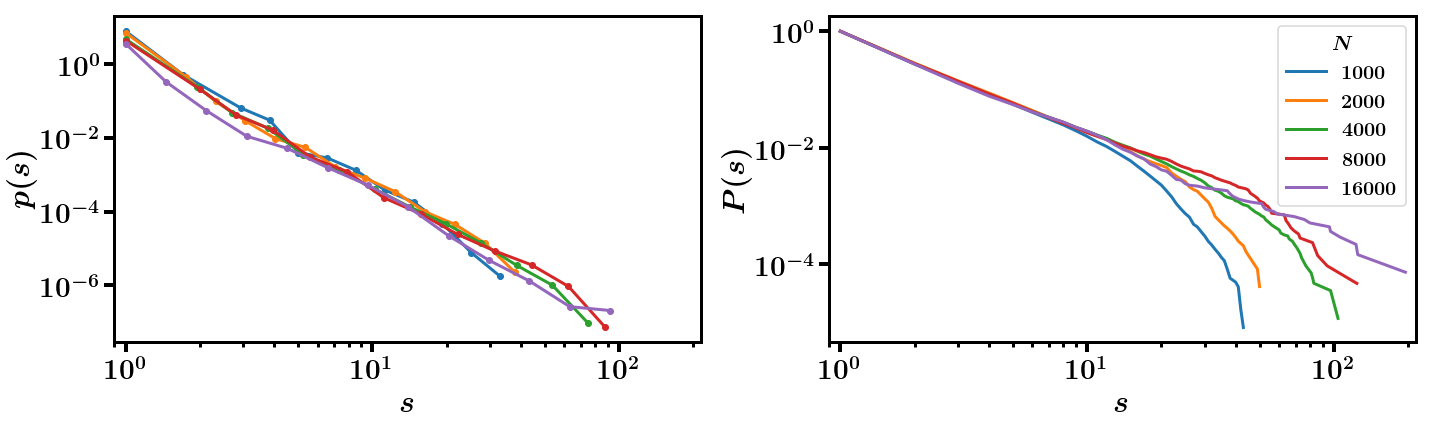

In [88]:
_N_values = N_values[-5:]
f_value = '0.73'
btw_dist_log = {}
for i, N in enumerate(_N_values):
    btw_dist_log[N] = {}
    Y = all_comp_sizes_dict[N][f_value]

    mask = Y > 0
    Y = Y[mask]     
    
    min_s = np.min(Y)
    max_s = np.max(Y)

    bins = np.logspace(np.log10(min_s), np.log10(max_s), 15)
    hist = np.histogram(Y, bins=bins, density=True)
    widths = (bins[1:] - bins[:-1])
    hist_norm = hist[0]/widths
    hist_norm[hist_norm==0] = np.NaN
    
    btw_dist_log[N][f_value] = [bins, hist_norm]

# log-scaled bins
ncols = 2
nrows = 1
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)

for ax in axes:
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel(r'$s$')
    ax.set_xlim(0.9, 1.1*np.max([np.max(elem) for elem in all_comp_sizes_dict[N].values()]))

ax = axes[0]
ax.set_ylabel(r'$p(s)$')
for i, N in enumerate(_N_values):   

    bins, hist_norm = btw_dist_log[N][f_value]
    mask = ~np.isnan(hist_norm)
    X = bins[:-1]
    X = X[mask]
    Y = hist_norm[mask]
    axes[0].plot(X, Y, 'o-', label=r'${{{}}}$'.format(f_value), color=colors[i])
    
ax = axes[1]
ax.set_ylabel(r'$P(s)$')
for i, N in enumerate(_N_values):  

    Y = all_comp_sizes_dict[N][f_value]

    sorted_vals, ccdf = get_ccdf(Y)
    ax.plot(sorted_vals, ccdf, '-' , color=colors[i], label=r'${{{}}}$'.format(N))
    
legend = ax.legend(loc='best', title=r'$N$', fontsize=20)
plt.setp(legend.get_title(),fontsize=20)

plt.tight_layout()
plt.show()

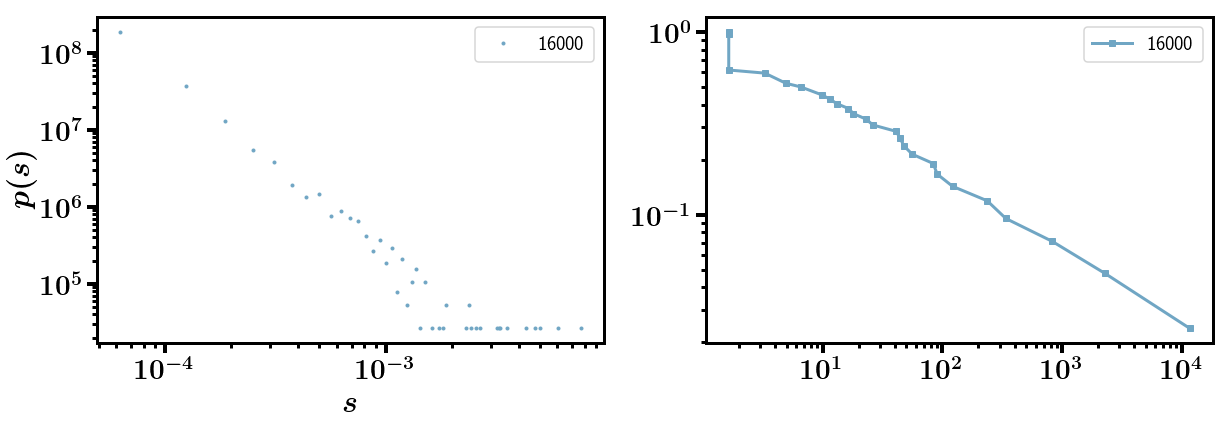

In [15]:
# log-scaled bins
ncols = 2
nrows = 1
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)

ax = axes[0]
y = {}
for N, p in Np_values:   
    Y = all_comp_sizes_dict[N][f_value]

    sorted_vals, ccdf = get_ccdf(Y)
    y[N] = (-np.diff(ccdf))*N**2
    ax.plot(sorted_vals[:-1]/N, y[N], '.', label=N)      

ax.set_xlabel(r'$s$')
ax.set_ylabel(r'$p(s)$')
ax.legend(loc='best', fontsize=20)
ax.set_xscale('log')
ax.set_yscale('log')

ax = axes[1]
for N, p in Np_values:   
    Y = all_comp_sizes_dict[N][f_value]

    sorted_vals, ccdf = get_ccdf(y[N])
    ax.plot(sorted_vals/N, ccdf, 's-' , label=N)   


ax.legend(loc='best', fontsize=20)
ax.set_xscale('log')
ax.set_yscale('log')

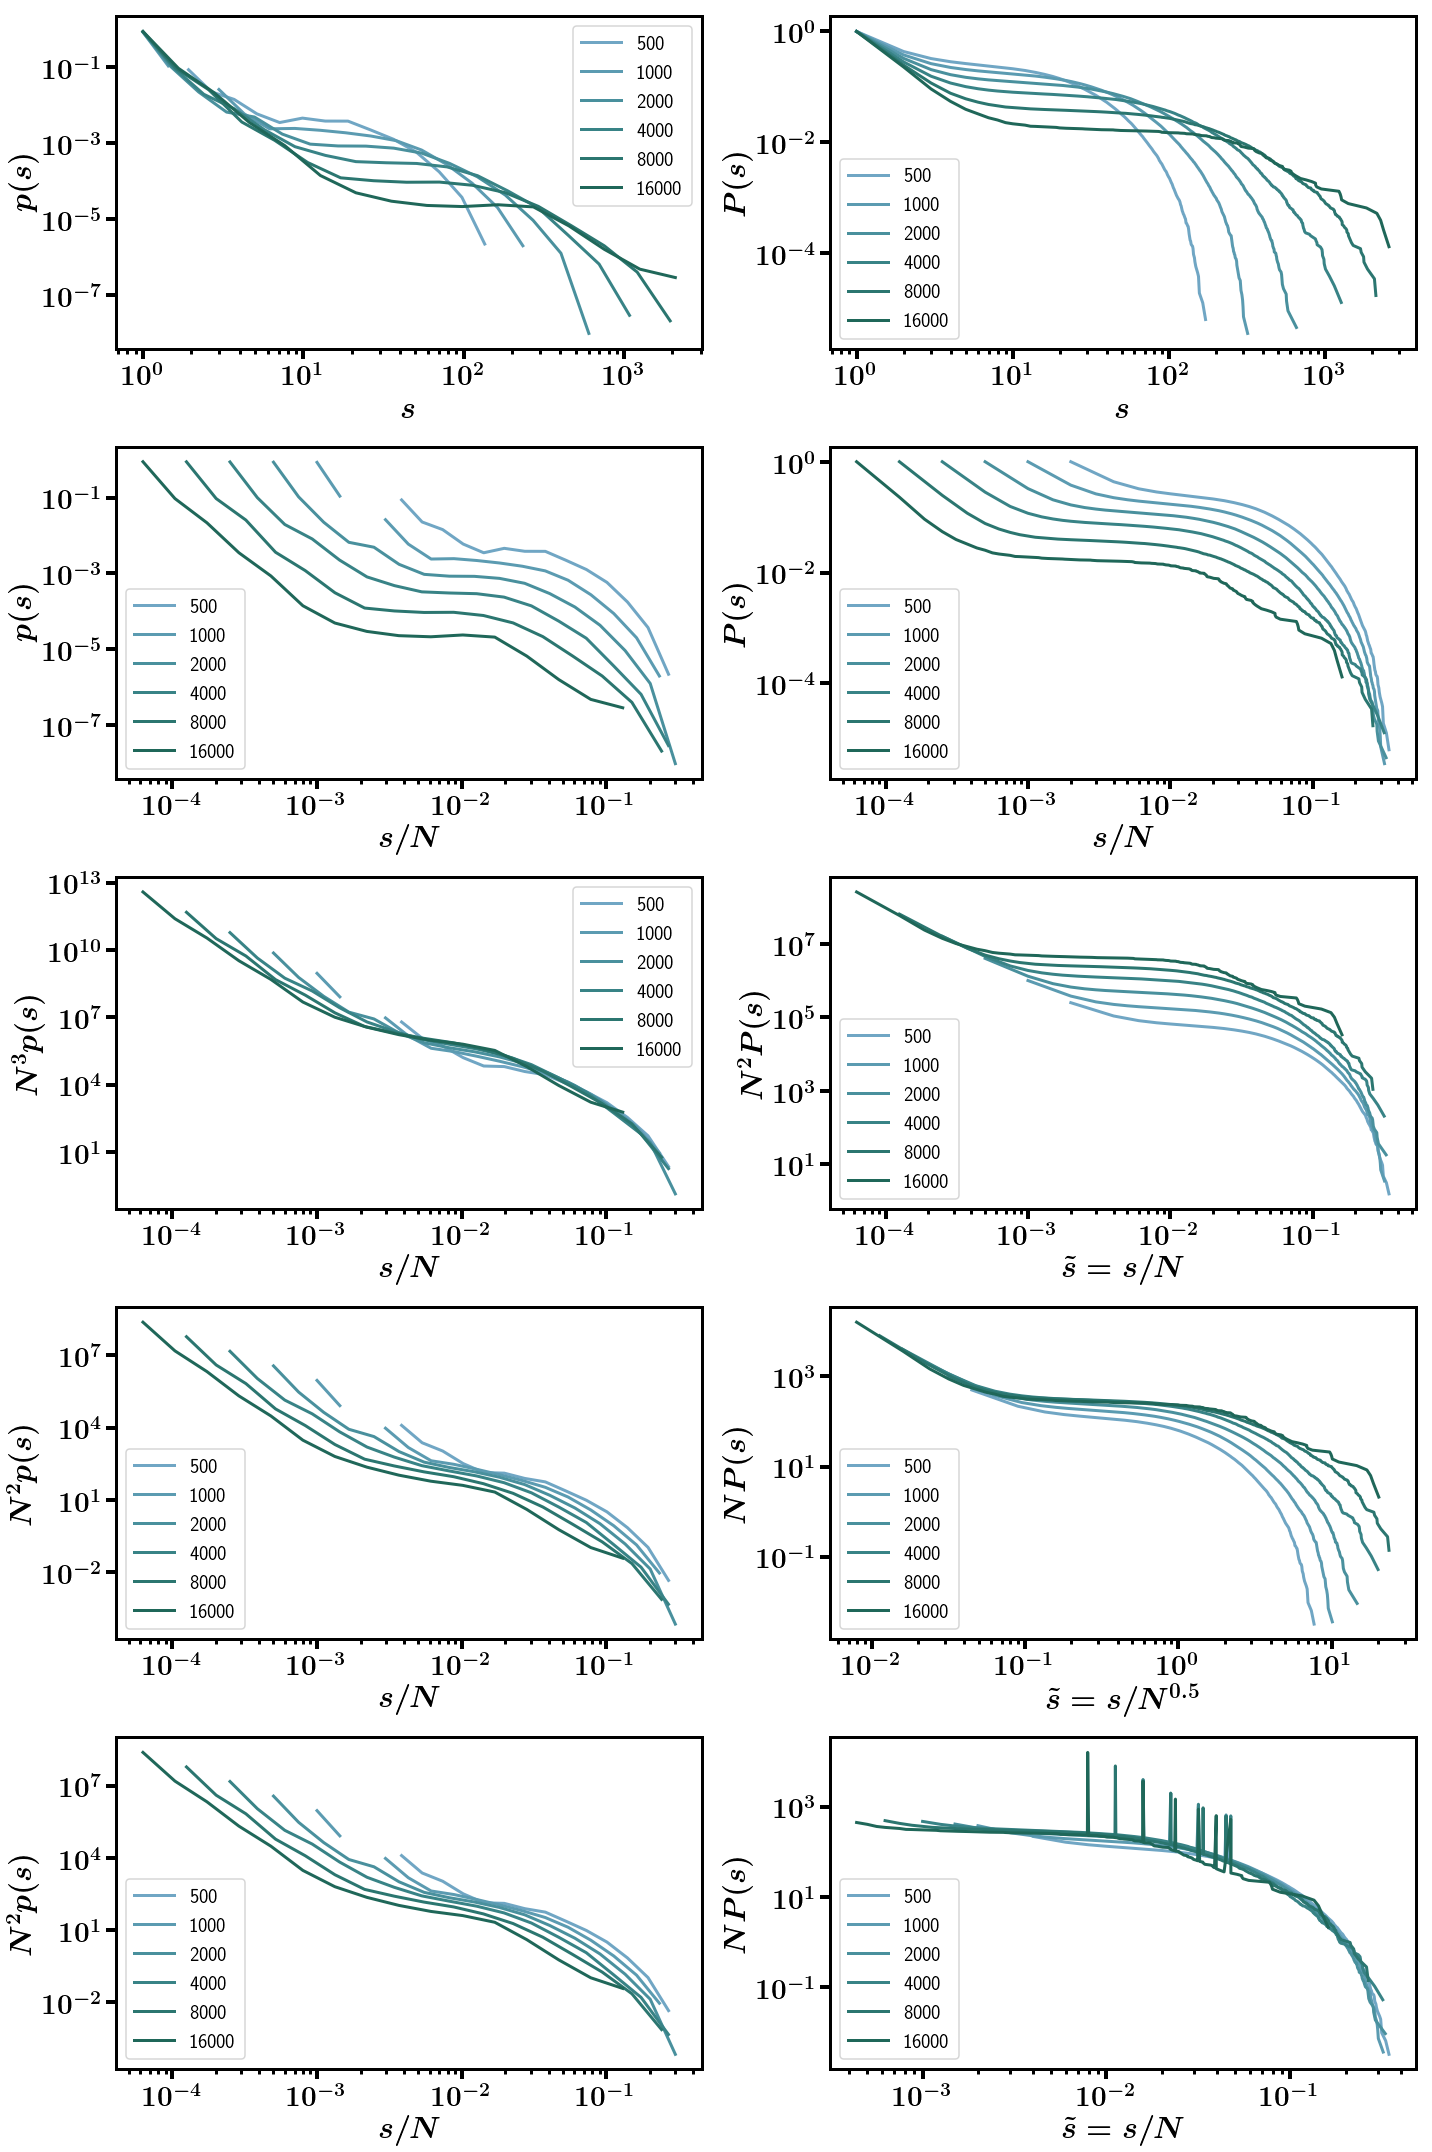

In [782]:
# log-scaled bins
ncols = 2
nrows = 5
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)

attack = 'BtwU'

ax = axes[0][0]
for N, p in [[500, 0.008], [1000, 0.004], [2000, 0.002], [4000, 0.001], [8000, 0.0005], [16000, 0.00025]]:
    
    bins = np.logspace(0, np.log10(N), 20)
    Y = all_comp_sizes_dict[N][f_value]
    #Y = (1.0*Y)/np.sum(Y)
    hist = np.histogram(Y, bins=bins, density=False)
    widths = (bins[1:] - bins[:-1])
    hist_norm = hist[0]/widths
    hist_norm = hist_norm / np.sum(hist_norm)
    #hist_norm = hist[0]
    hist_norm[hist_norm==0] = np.NaN
    
    ax.plot(bins[:-1], hist_norm, label=N)
    #ax.plot(hist[1][1:], hist[0], label=N)

ax.set_xlabel(r'$s$')
ax.set_ylabel(r'$p(s)$')
ax.legend(loc='best', fontsize=20)
ax.set_xscale('log')
ax.set_yscale('log')

ax = axes[0][1]

for N, p in [[500, 0.008], [1000, 0.004], [2000, 0.002], [4000, 0.001], [8000, 0.0005], [16000, 0.00025]]:
    bins = np.logspace(0, np.log10(N), 20)
    widths = (bins[1:] - bins[:-1])
    
    Y = all_comp_sizes_dict[N][f_value]
    #Y = Y/np.sum(Y)
    #hist = np.histogram(Y, bins=bins)
    #hist_norm = hist[0]/widths
    
    #hist_norm[hist_norm==0] = np.NaN
    #ax.plot(bins[:-1], hist_norm, label=N)
    sorted_vals, ccdf = get_ccdf(Y)
    ax.plot(sorted_vals, ccdf, label=N)

ax.set_xlabel(r'$s$')
ax.set_ylabel(r'$P(s)$')
ax.legend(loc='best', fontsize=20)
ax.set_xscale('log')
ax.set_yscale('log')

ax = axes[1][0]
for N, p in [[500, 0.008], [1000, 0.004], [2000, 0.002], [4000, 0.001], [8000, 0.0005], [16000, 0.00025]]:
    
    bins = np.logspace(0, np.log10(N), 20)
    Y = all_comp_sizes_dict[N][f_value]
    #Y = (1.0*Y)/np.sum(Y)
    hist = np.histogram(Y, bins=bins, density=False)
    widths = (bins[1:] - bins[:-1])
    hist_norm = hist[0]/widths
    hist_norm = hist_norm / np.sum(hist_norm)
    #hist_norm = hist[0]
    hist_norm[hist_norm==0] = np.NaN
    
    ax.plot(bins[:-1]/N, hist_norm, label=N)
    #ax.plot(hist[1][1:], hist[0], label=N)

ax.set_xlabel(r'$s/N$')
ax.set_ylabel(r'$p(s)$')
ax.legend(loc='best', fontsize=20)
ax.set_xscale('log')
ax.set_yscale('log')

ax = axes[1][1]

for N, p in [[500, 0.008], [1000, 0.004], [2000, 0.002], [4000, 0.001], [8000, 0.0005], [16000, 0.00025]]:
    bins = np.logspace(0, np.log10(N), 20)
    widths = (bins[1:] - bins[:-1])
    
    Y = all_comp_sizes_dict[N][f_value]
    #Y = Y/np.sum(Y)
    #hist = np.histogram(Y, bins=bins)
    #hist_norm = hist[0]/widths
    
    #hist_norm[hist_norm==0] = np.NaN
    #ax.plot(bins[:-1], hist_norm, label=N)
    sorted_vals, ccdf = get_ccdf(Y)
    ax.plot(sorted_vals/N, ccdf, label=N)

ax.set_xlabel(r'$s/N$')
ax.set_ylabel(r'$P(s)$')
ax.legend(loc='best', fontsize=20)
ax.set_xscale('log')
ax.set_yscale('log')

ax = axes[2][0]
for N, p in [[500, 0.008], [1000, 0.004], [2000, 0.002], [4000, 0.001], [8000, 0.0005], [16000, 0.00025]]:
    
    bins = np.logspace(0, np.log10(N), 20)
    #bins=20
    Y = all_comp_sizes_dict[N][f_value]
    #Y = (1.0*Y)/np.sum(Y)
    hist = np.histogram(Y, bins=bins, density=True)
    widths = (bins[1:] - bins[:-1])
    hist_norm = hist[0]/widths
    
    hist_norm = hist_norm / np.sum(hist_norm)
    hist_norm[hist_norm==0] = np.NaN
    
    ax.plot(bins[:-1]/N, hist_norm*N**3, label=N)
    #ax.plot(hist[1][1:], hist[0], label=N)

ax.set_xlabel(r'$s/N$')
ax.set_ylabel(r'$N^3 p(s)$')
ax.legend(loc='best', fontsize=20)
ax.set_xscale('log')
ax.set_yscale('log')

ax = axes[2][1]

for N, p in [[500, 0.008], [1000, 0.004], [2000, 0.002], [4000, 0.001], [8000, 0.0005], [16000, 0.00025]]:
    bins = np.logspace(0, np.log10(N), 20)
    widths = (bins[1:] - bins[:-1])
    
    Y = all_comp_sizes_dict[N][f_value]
    #Y = Y/np.sum(Y)
    #hist = np.histogram(Y, bins=bins)
    #hist_norm = hist[0]/widths
    
    #hist_norm[hist_norm==0] = np.NaN
    #ax.plot(bins[:-1], hist_norm, label=N)
    sorted_vals, ccdf = get_ccdf(Y)
    ax.plot(sorted_vals/N, ccdf*N**2, label=N)

ax.set_xlabel(r'$\tilde{s} = s/N$')
ax.set_ylabel(r'$N^2 P(s)$')
ax.legend(loc='best', fontsize=20)
ax.set_xscale('log')
ax.set_yscale('log')

ax = axes[3][0]
for N, p in [[500, 0.008], [1000, 0.004], [2000, 0.002], [4000, 0.001], [8000, 0.0005], [16000, 0.00025]]:
    
    bins = np.logspace(0, np.log10(N), 20)
    #bins=20
    Y = all_comp_sizes_dict[N][f_value]
    #Y = (1.0*Y)/np.sum(Y)
    hist = np.histogram(Y, bins=bins, density=True)
    widths = (bins[1:] - bins[:-1])
    hist_norm = hist[0]/widths
    
    hist_norm = hist_norm / np.sum(hist_norm)
    hist_norm[hist_norm==0] = np.NaN
    
    ax.plot(bins[:-1]/N, hist_norm*N**2, label=N)
    #ax.plot(hist[1][1:], hist[0], label=N)

ax.set_xlabel(r'$s/N$')
ax.set_ylabel(r'$N^2 p(s)$')
ax.legend(loc='best', fontsize=20)
ax.set_xscale('log')
ax.set_yscale('log')

ax = axes[3][1]

for N, p in [[500, 0.008], [1000, 0.004], [2000, 0.002], [4000, 0.001], [8000, 0.0005], [16000, 0.00025]]:
    bins = np.logspace(0, np.log10(N), 20)
    widths = (bins[1:] - bins[:-1])
    
    Y = all_comp_sizes_dict[N][f_value]
    #Y = Y/np.sum(Y)
    #hist = np.histogram(Y, bins=bins)
    #hist_norm = hist[0]/widths
    
    #hist_norm[hist_norm==0] = np.NaN
    #ax.plot(bins[:-1], hist_norm, label=N)
    sorted_vals, ccdf = get_ccdf(Y)
    ax.plot(sorted_vals/N**0.5, ccdf*N, label=N)

ax.set_xlabel(r'$\tilde{s} = s/N^{0.5}$')
ax.set_ylabel(r'$N P(s)$')
ax.legend(loc='best', fontsize=20)
ax.set_xscale('log')
ax.set_yscale('log')

ax = axes[4][0]
for N, p in [[500, 0.008], [1000, 0.004], [2000, 0.002], [4000, 0.001], [8000, 0.0005], [16000, 0.00025]]:
    
    bins = np.logspace(0, np.log10(N), 20)
    #bins=20
    Y = all_comp_sizes_dict[N][f_value]
    #Y = (1.0*Y)/np.sum(Y)
    hist = np.histogram(Y, bins=bins, density=True)
    widths = (bins[1:] - bins[:-1])
    hist_norm = hist[0]/widths
    
    hist_norm = hist_norm / np.sum(hist_norm)
    hist_norm[hist_norm==0] = np.NaN
    
    ax.plot(bins[:-1]/N, hist_norm*N**2, label=N)
    #ax.plot(hist[1][1:], hist[0], label=N)

ax.set_xlabel(r'$s/N$')
ax.set_ylabel(r'$N^2 p(s)$')
ax.legend(loc='best', fontsize=20)
ax.set_xscale('log')
ax.set_yscale('log')

ax = axes[4][1]

for N, p in [[500, 0.008], [1000, 0.004], [2000, 0.002], [4000, 0.001], [8000, 0.0005], [16000, 0.00025]]:
    bins = np.logspace(0, np.log10(N), 20)
    widths = (bins[1:] - bins[:-1])
    
    Y = all_comp_sizes_dict[N][f_value]
    #Y = Y/np.sum(Y)
    #hist = np.histogram(Y, bins=bins)
    #hist_norm = hist[0]/widths
    
    #hist_norm[hist_norm==0] = np.NaN
    #ax.plot(bins[:-1], hist_norm, label=N)
    sorted_vals, ccdf = get_ccdf(Y)
    trans_x = sorted_vals/N**0.5
    trans_y = ccdf*N
    
    eje_x = []
    for i, v in enumerate(trans_x):
        if v < 0.05:
            eje_x.append(sorted_vals[i]/N**0.5)
        else:
            eje_x.append(sorted_vals[i]/N)
    
    eje_y = trans_y
    
    eje_x, eje_y = zip(*sorted(zip(eje_x, eje_y), key=lambda x: x[0]))
    ax.plot(eje_x, eje_y, label=N)

ax.set_xlabel(r'$\tilde{s} = s/N$')
ax.set_ylabel(r'$N P(s)$')
ax.legend(loc='best', fontsize=20)
ax.set_xscale('log')
ax.set_yscale('log')

plt.tight_layout()
#fig_name = os.path.join(fig_dir, 'comp_sizes_btw')
#plt.savefig(fig_name + '.png')
#plt.savefig(fig_name + '.pdf')
plt.show()

In [613]:
nu

1.65

In [614]:
beta_over_nu*nu

0.16591231171603485

In [615]:
gamma_over_nu*nu

1.3970449288895934

In [21]:
f_values = [0.22]
Ngcc_values = {}
for i, (N, p) in list(enumerate(zip(N_values, p_values))):
    print(N)

    Ngcc_values[N] = {}
    for f in f_values:
        Ngcc_values[N][f] = []

        for seed in range(max_seed):
            network_base = 'ER_N{}_p{}'.format(N, p)
            network = network_base + '_{:05d}'.format(seed)
            attack_dir_name = os.path.join(net_dir_name, network_base, network, attack)

            full_file_name  = os.path.join(attack_dir_name, 'comp_data_' + network + '.txt')
            if not os.path.isfile(full_file_name):
                continue

            aux = np.loadtxt(full_file_name, dtype=int, usecols=0)
            Ngcc = aux[int(f*N)]

            Ngcc_values[N][f].append(Ngcc)

125
250
500
1000
2000
4000
8000


IndexError: index 1760 is out of bounds for axis 0 with size 1359

In [23]:
Sgcc_values = {}
for N in N_values[:-2]:
    Sgcc_values[N] = {}
    #Sgcc_values[N][0.225] = np.array(Ngcc_values[N][0.225], dtype=float) / N
    Sgcc_values[N][0.22] = np.array(Ngcc_values[N][0.22], dtype=float) / N

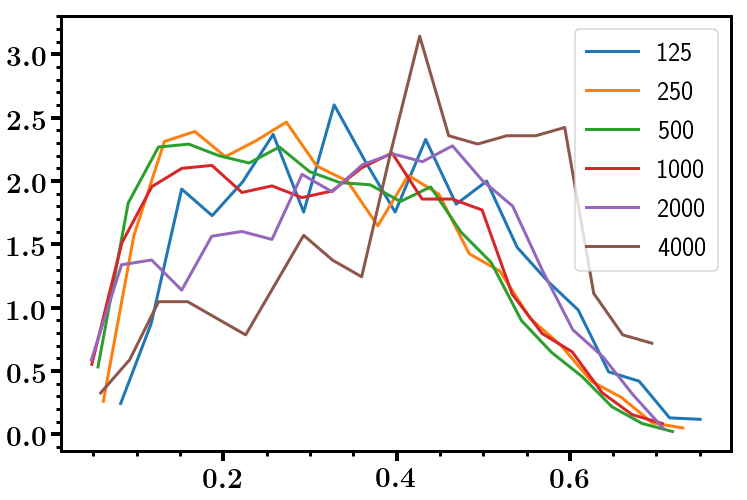

In [25]:
ncols = 1
nrows = 1
fig, axes = plt.subplots(figsize=(12*ncols, 8*nrows), ncols=ncols, nrows=nrows)
ax = axes
for N in N_values[:-2]:
    hist, bin_edges = np.histogram(Sgcc_values[N][f], bins=20, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    ax.plot(bin_centers, hist, label=N )
plt.legend()    
plt.show()

## DegU

/media/nahuel-ofi/datos/d/anaconda3/envs/networks3/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


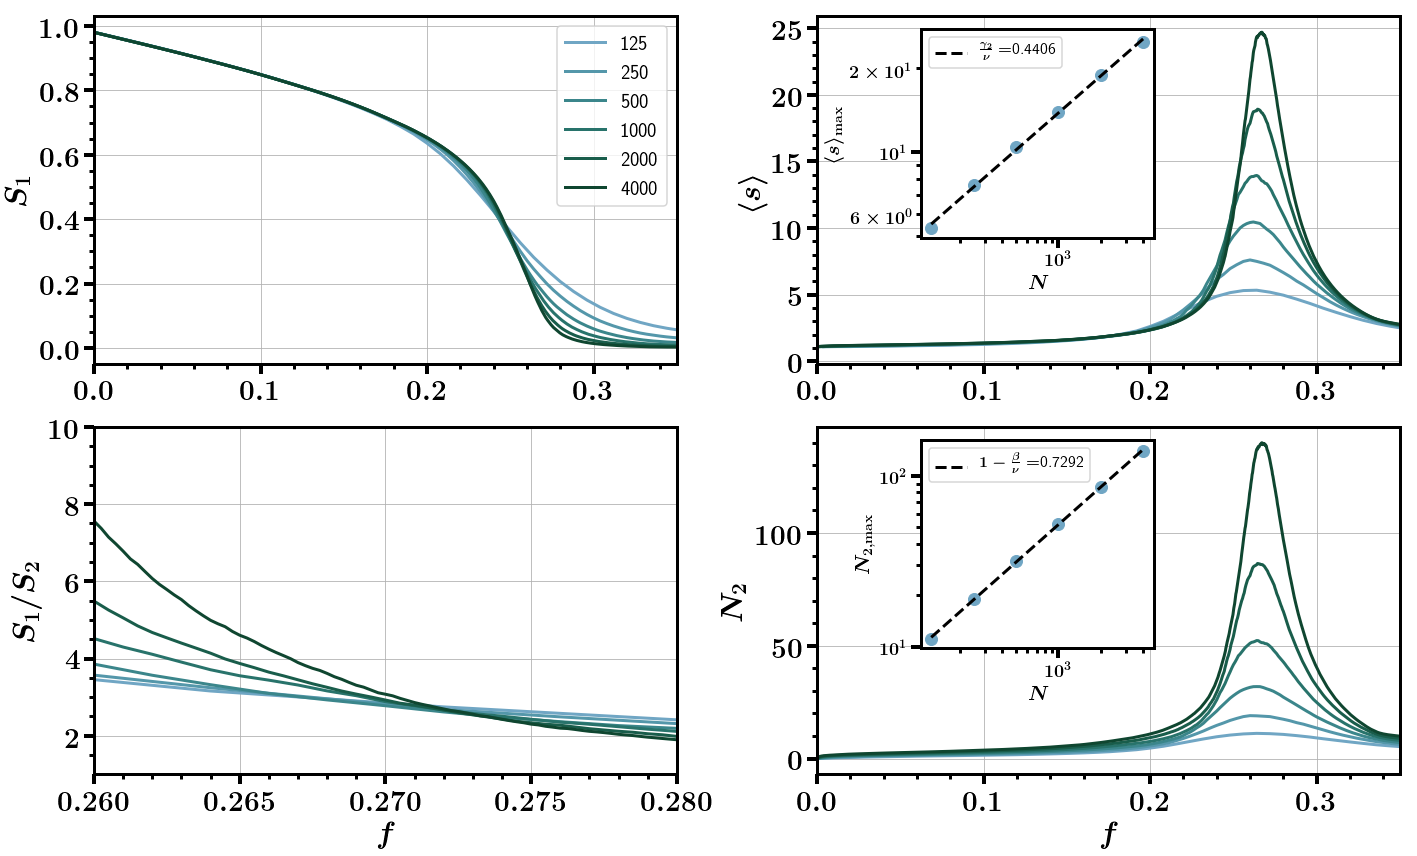

In [128]:
palette = sns.cubehelix_palette(
    n_colors=len(N_values), start=2.0, rot=0.35, gamma=1.0, hue=1.0, light=0.6, dark=0.2,
)
plt.rc('axes', prop_cycle=cycler('color', palette))

_N_values = N_values

attack = 'DegU'

ncols = 2
nrows = 2
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)

for ax in axes.flatten():
    ax.set_xlim(0., 0.35)
    ax.grid(True)

ax = axes[0][0]
#ax.plot(dfs[N]['t'], 1-dfs[N]['t'], color='black', linestyle='-.', label='')
for N in _N_values:
    #ax.plot(dfs[N]['t'], dfs[N]['Sgcc']/(dfs[N]['Sgcc'][0]*(1-dfs[N]['t'])), label='{}'.format(N))
    ax.plot(dfs[attack][N]['t'], dfs[attack][N]['Sgcc'], label='{}'.format(N))
ax.set_ylabel(r'$S_1$')
#ax.set_ylim(0.6, 1)
ax.legend(loc='best', fontsize=20)

ax = axes[0][1]
for N in _N_values:
    ax.plot(dfs[attack][N]['t'], dfs[attack][N]['meanS2'])
ax.set_ylabel(r'$\langle s \rangle $')

ax = axes[1][1]
for N in _N_values:
    ax.plot(dfs[attack][N]['t'], dfs[attack][N]['Nsec'])
ax.set_ylabel(r'$N_2$')

ax = axes[1][0]
#ax.set_yscale('log')
ax.set_ylim(1, 10)
ax.set_xlim(0.26, 0.28)
#ax.axvline(0.225, color='k', linestyle='--')

for N in _N_values:
    ax.plot(dfs[attack][N]['t'], N*dfs[attack][N]['Sgcc']/dfs[attack][N]['Nsec'])
ax.set_ylabel(r'$S_1/S_2$')


axes[1][0].set_xlabel(r'$f$')
axes[1][1].set_xlabel(r'$f$')

measures = ['meanS2', 'Nsec']

_N_values = N_values

peaks = {}
slopes = {}
Y_preds = {}
for measure in measures:
    peak = []
    for N in _N_values:

        idx = dfs[attack][N][measure].idxmax()
        Y = dfs[attack][N][measure][idx]
        peak.append(Y)
    peaks[measure] = np.array(peak)

    X = np.log(_N_values).reshape(-1, 1)
    Y = np.log(peak).reshape(-1, 1)
    linear_regressor.fit(X, Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)  # make predictions
    Y_preds[measure] = Y_pred
    slope = linear_regressor.coef_[0][0]
    slopes[measure] = slope


axins = inset_axes(axes[0][1], width="100%", height="100%",
                   bbox_to_anchor=(.2, .4, .4, .60),
                   bbox_transform=axes[0][1].transAxes)
                   #loc=2, borderpad=3)
axins.set_xscale('log')
axins.set_yscale('log')
axins.tick_params(which='major', labelsize=18)
axins.tick_params(which='minor', labelsize=18)
axins.set_xlabel(r"$N$", fontsize=20) 
axins.plot(_N_values, peaks['meanS2'], 'o', markersize=12)
axins.plot(_N_values, np.exp(Y_preds['meanS2']), '--', color='k', linewidth=3, 
        label=r"$\frac{\gamma_2}{\nu} = $" + '{:.4f}'.format(slopes['meanS2']))
axins.legend(loc='best', fontsize=16)    
axins.set_ylabel(r"$\langle s \rangle_{\mathrm{max}} $", fontsize=20) 

axins = inset_axes(axes[1][1], width="100%", height="100%",
                   bbox_to_anchor=(.2, .4, .4, .60),
                   bbox_transform=axes[1][1].transAxes)
                   #loc=2, borderpad=3)
axins.set_xscale('log')
axins.set_yscale('log')
axins.tick_params(which='major', labelsize=18)
axins.tick_params(which='minor', labelsize=18)
axins.set_xlabel(r"$N$", fontsize=20) 
axins.plot(_N_values, peaks['Nsec'], 'o', markersize=12)    
axins.plot(_N_values, np.exp(Y_preds['Nsec']), '--', color='k', linewidth=3, 
        label=r"$1 - \frac{\beta}{\nu} = $" + '{:.4f}'.format(slopes['Nsec']))
axins.legend(loc='best', fontsize=16)    
axins.set_ylabel(r"$N_{2,\mathrm{max}}$", fontsize=20)  

    
plt.tight_layout()
fig_name = os.path.join(fig_dir, 'fssa_{}'.format(attack))
#plt.savefig(fig_name + '.png')
#plt.savefig(fig_name + '.pdf')
plt.show()

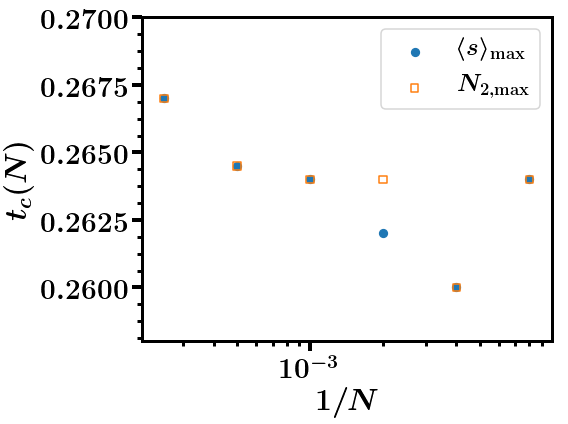

In [131]:
measures = ['meanS2', 'Nsec']

_N_values = N_values

peaks = {}
slopes = {}
Y_preds = {}
tc_values = {}
for measure in measures:
    peak = []
    tc = []
    for N in _N_values:

        idx = dfs[attack][N][measure].idxmax()
        Y = dfs[attack][N][measure][idx]
        peak.append(Y)
        tc.append(idx/N)
    peaks[measure] = np.array(peak)
    tc_values[measure] = np.array(tc)
    
    X = np.log(_N_values).reshape(-1, 1)
    Y = np.log(peak).reshape(-1, 1)
    linear_regressor.fit(X, Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)  # make predictions
    Y_preds[measure] = Y_pred
    slope = linear_regressor.coef_[0][0]
    slopes[measure] = slope

ncols = 1
nrows = 1
fig, axes = plt.subplots(figsize=(8*ncols, 6*nrows), ncols=ncols, nrows=nrows)

ax = axes
ax.set_xscale('log')
ax.set_xlabel(r"$1/N$") 
    
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
markers = ['o', 's', '^']
facecolors = ['#1f77b4', 'none', '#2ca02c']
labels = [r"$\langle s \rangle_{\mathrm{max}} $", r"$N_{2,\mathrm{max}}$"]
for i, measure in enumerate(measures):
      
    ax.scatter(1/np.array(_N_values), tc_values[measure], marker=markers[i], 
               color=colors[i], facecolor=facecolors[i], s=60, label=labels[i])

ax.set_ylabel(r'$t_c(N)$')
ax.set_ylim(0.258, 0.27)
#[0].set_ylabel(r"$\chi_{\mathrm{max}}$")   

#axes[1].set_ylabel(r"$\langle s \rangle_{\mathrm{max}} $")   
    
#axes[2].set_ylabel(r"$N_{2,\mathrm{max}}$")  
ax.legend(loc='best', fontsize=24)
plt.tight_layout()
fig_name = os.path.join(fig_dir, 'tc_{}'.format(attack))
#plt.savefig(fig_name + '.png')
#plt.savefig(fig_name + '.pdf')
plt.show()

## Paper

In [18]:
_N_values = N_values[:-1]
attack = 'BtwU'
measures= ['meanS2', 'Nsec']
peak_values = {}
fc_values = {}
measure_fc_values = {}
fc = 0.227
for measure in measures:
    fc_values[measure], peak_values[measure] = get_fc_N(dfs, attack, _N_values, measure)
    measure_fc_values[measure] = get_crit_measure_N(dfs, attack, _N_values, measure, fc_values[measure])
    
Sgcc_crit = get_crit_measure_N(dfs, attack, _N_values, 'Sgcc', fc_values['Nsec'])
Y_preds, slopes = get_slopes(_N_values, peak_values, measure_fc_values)

get_slopes(_N_values, peak_values, measure_fc_values)

{'max': {'meanS2': 0.851837261808995, 'Nsec': 0.8975916216524348},
 'fc': {'meanS2': 0.851837261808995, 'Nsec': 0.8975916216524348}}

/media/nahuel-ofi/datos/d/anaconda3/envs/networks3/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


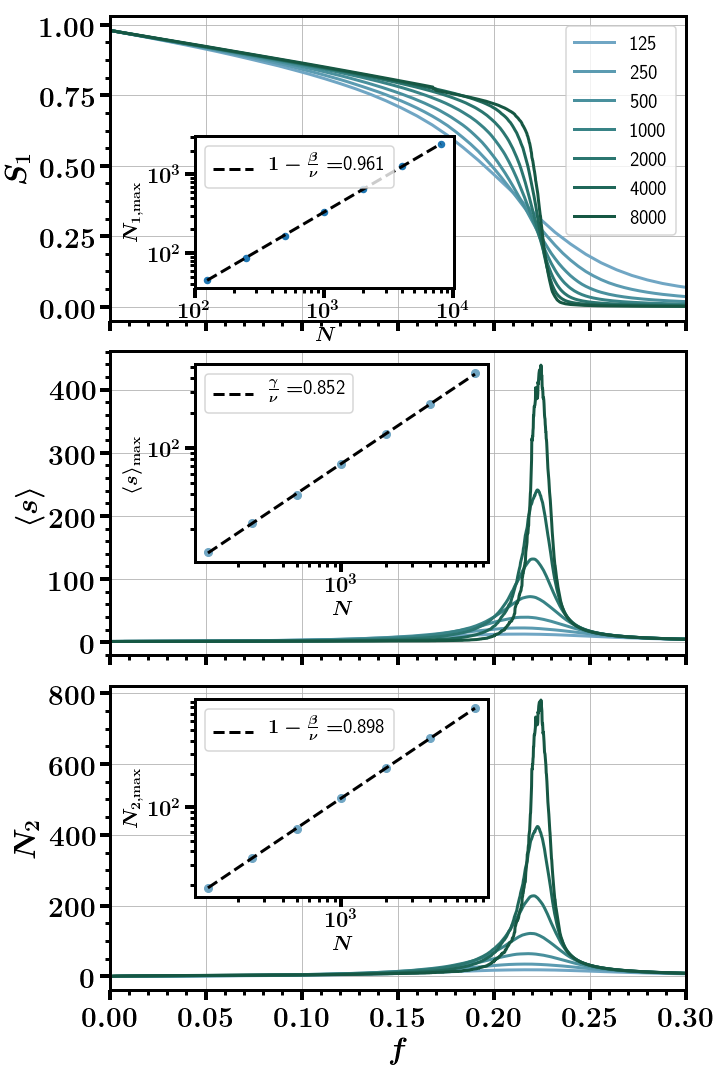

In [9]:
palette = sns.cubehelix_palette(
    n_colors=len(N_values), start=2.0, rot=0.35, gamma=1.0, hue=1.0, light=0.6, dark=0.2,
)
plt.rc('axes', prop_cycle=cycler('color', palette))

_N_values = N_values[:-1]

attack = 'BtwU'

ncols = 1
nrows = 3
fig, axes = plt.subplots(figsize=(10*ncols, 5*nrows), ncols=ncols, nrows=nrows, sharex=True)

for ax in axes.flatten():
    ax.set_xlim(0., 0.3)
    ax.grid(True)

ax = axes[0]
for N in _N_values:
    ax.plot(dfs[attack][N]['t'], dfs[attack][N]['Sgcc'], label='{}'.format(N))
ax.set_ylabel(r'$S_1$')
ax.legend(loc='best', fontsize=20)

ax = axes[1]
for N in _N_values:
    ax.plot(dfs[attack][N]['t'], dfs[attack][N]['meanS2'])
ax.set_ylabel(r'$\langle s \rangle $')

ax = axes[2]
for N in _N_values:
    ax.plot(dfs[attack][N]['t'], dfs[attack][N]['Nsec'])
ax.set_ylabel(r'$N_2$')
ax.set_xlabel(r'$f$')

measures = ['meanS2', 'Nsec']
peaks = {}
slopes = {}
Y_preds = {}
tc_values = {}
for measure in measures:
    peak = []
    tc = []
    for N in _N_values:

        idx = dfs[attack][N][measure].idxmax()
        Y = dfs[attack][N][measure][idx]
        peak.append(Y)
        tc.append(idx/N)
    peaks[measure] = np.array(peak)
    tc_values[measure] = np.array(tc)
    
    X = np.log(_N_values).reshape(-1, 1)
    Y = np.log(peak).reshape(-1, 1)
    linear_regressor.fit(X, Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)  # make predictions
    Y_preds[measure] = Y_pred
    slope = linear_regressor.coef_[0][0]
    slopes[measure] = slope

    
### Inset GCC
axins = inset_axes(axes[0], width="100%", height="100%",
                   bbox_to_anchor=(.17, .15, .45, .5),
                   bbox_transform=axes[0].transAxes)
                   #loc=2, borderpad=3)
axins.set_xscale('log')
axins.set_yscale('log')
axins.tick_params(which='major', labelsize=22)
axins.tick_params(which='minor', labelsize=22)
axins.set_xlabel(r"$N$", fontsize=20) 
for N, tc_N in zip(_N_values, tc_values['Nsec']):
    plt.scatter(N, N*dfs[attack][N]['Sgcc'][int(N*tc_N)], color=colors[0])
    #plt.scatter(N, N*dfs[attack][N]['Sgcc'][int(N*0.225)], color=colors[0])

    X = np.log(_N_values).reshape(-1, 1)
    Ngcc_tc = [N*dfs[attack][N]['Sgcc'][int(N*tc_values['Nsec'][i])] for (i, N) in enumerate(_N_values)]
    #Ngcc_tc = [N*dfs[attack][N]['Sgcc'][int(N*0.225)] for (i, N) in enumerate(_N_values)]
    Ngcc_tc = np.array(Ngcc_tc)
    Y = np.log(Ngcc_tc).reshape(-1, 1)
    linear_regressor.fit(X, Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)  # make predictions
    slope = linear_regressor.coef_[0][0]

axins.plot(_N_values, np.exp(Y_pred), '--', color='k', linewidth=3, 
        label=r"$1-\frac{\beta}{\nu} = $" + '{:.3f}'.format(slope))
axins.legend(loc='best', fontsize=20)    
axins.set_ylabel(r"$N_{1,\mathrm{max}} $", fontsize=20) 
    
### Inset <s>
axins = inset_axes(axes[1], width="100%", height="100%",
                   bbox_to_anchor=(.17, .35, .51, .65),
                   bbox_transform=axes[1].transAxes)
                   #loc=2, borderpad=3)
axins.set_xscale('log')
axins.set_yscale('log')
axins.tick_params(which='major', labelsize=22)
axins.tick_params(which='minor', labelsize=22)
axins.set_xlabel(r"$N$", fontsize=20) 
axins.plot(_N_values, peaks['meanS2'], 'o', markersize=8)
axins.plot(_N_values, np.exp(Y_preds['meanS2']), '--', color='k', linewidth=3, 
        label=r"$\frac{\gamma}{\nu} = $" + '{:.3f}'.format(slopes['meanS2']))
axins.legend(loc='best', fontsize=20)    
axins.set_ylabel(r"$\langle s \rangle_{\mathrm{max}} $", fontsize=20) 
axins.grid(False)

### Inset Second
axins = inset_axes(axes[2], width="100%", height="100%",
                   bbox_to_anchor=(.17, .35, .51, .65),
                   bbox_transform=axes[2].transAxes)
                   #loc=2, borderpad=3)
axins.set_xscale('log')
axins.set_yscale('log')
axins.tick_params(which='major', labelsize=22)
axins.tick_params(which='minor', labelsize=22)
axins.set_xlabel(r"$N$", fontsize=20) 
axins.plot(_N_values, peaks['Nsec'], 'o', markersize=8)    
axins.plot(_N_values, np.exp(Y_preds['Nsec']), '--', color='k', linewidth=3, 
        label=r"$1 - \frac{\beta}{\nu} = $" + '{:.3f}'.format(slopes['Nsec']))
axins.legend(loc='best', fontsize=20)    
axins.set_ylabel(r"$N_{2,\mathrm{max}}$", fontsize=20)  
axins.grid(False)
    
plt.tight_layout()
fig_name = os.path.join(fig_dir, 'fssa_{}_draft'.format(attack))
plt.savefig(fig_name + '.png', transparent=False)
plt.savefig(fig_name + '.pdf', transparent=False)
plt.show()

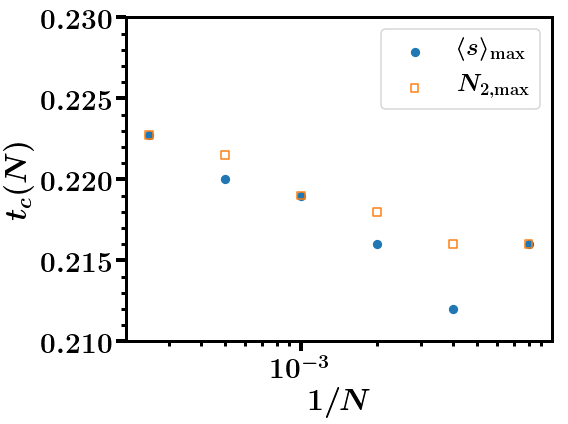

In [23]:
measures = ['meanS2', 'Nsec']

_N_values = N_values

peaks = {}
slopes = {}
Y_preds = {}
tc_values = {}
for measure in measures:
    peak = []
    tc = []
    for N in _N_values:

        idx = dfs[attack][N][measure].idxmax()
        Y = dfs[attack][N][measure][idx]
        peak.append(Y)
        tc.append(idx/N)
    peaks[measure] = np.array(peak)
    tc_values[measure] = np.array(tc)
    
    X = np.log(_N_values).reshape(-1, 1)
    Y = np.log(peak).reshape(-1, 1)
    linear_regressor.fit(X, Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)  # make predictions
    Y_preds[measure] = Y_pred
    slope = linear_regressor.coef_[0][0]
    slopes[measure] = slope

ncols = 1
nrows = 1
fig, axes = plt.subplots(figsize=(8*ncols, 6*nrows), ncols=ncols, nrows=nrows)

ax = axes
ax.set_xscale('log')
ax.set_xlabel(r"$1/N$") 
    
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
markers = ['o', 's', '^']
facecolors = ['#1f77b4', 'none', '#2ca02c']
labels = [r"$\langle s \rangle_{\mathrm{max}} $", r"$N_{2,\mathrm{max}}$"]
for i, measure in enumerate(measures):
      
    ax.scatter(1/np.array(_N_values), tc_values[measure], marker=markers[i], 
               color=colors[i], facecolor=facecolors[i], s=60, label=labels[i])

ax.set_ylabel(r'$t_c(N)$')
ax.set_ylim(0.21, 0.23)

ax.legend(loc='best', fontsize=24)
plt.tight_layout()
fig_name = os.path.join(fig_dir, 'tc_{}'.format(attack))
plt.savefig(fig_name + '.png')
plt.savefig(fig_name + '.pdf')
plt.show()